In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')

train_id = train['id']
test_id = test['id']

y = train['class']

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [4]:
train.head()

id class  cap-diameter cap-shape cap-surface cap-color  \
0   0     e          8.80         f           s         u   
1   1     p          4.51         x           h         o   
2   2     e          6.94         f           s         b   
3   3     e          3.88         f           y         g   
4   4     e          5.85         x           l         w   

  does-bruise-or-bleed gill-attachment gill-spacing gill-color  ...  \
0                    f               a            c          w  ...   
1                    f               a            c          n  ...   
2                    f               x            c          w  ...   
3                    f               s          NaN          g  ...   
4                    f               d          NaN          w  ...   

   stem-root  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0        NaN           NaN          w       NaN        NaN        f         f   
1        NaN             y          o       NaN        NaN        t         z   
2        NaN             s          n       NaN        NaN        f         f   
3        NaN           NaN          w       NaN        NaN        f         f   
4        NaN           NaN          w       NaN        NaN        f         f   

  spore-print-color habitat season  
0               NaN       d      a  
1               NaN       d      w  
2               NaN       l      w  
3               NaN       d      u  
4               NaN       g      a  

[5 rows x 22 columns]

In [5]:
train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [6]:
test.isnull().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [7]:
train.describe()

id  cap-diameter   stem-height    stem-width
count  3.116945e+06  3.116941e+06  3.116945e+06  3.116945e+06
mean   1.558472e+06  6.309848e+00  6.348333e+00  1.115379e+01
std    8.997847e+05  4.657931e+00  2.699755e+00  8.095477e+00
min    0.000000e+00  3.000000e-02  0.000000e+00  0.000000e+00
25%    7.792360e+05  3.320000e+00  4.670000e+00  4.970000e+00
50%    1.558472e+06  5.750000e+00  5.880000e+00  9.650000e+00
75%    2.337708e+06  8.240000e+00  7.410000e+00  1.563000e+01
max    3.116944e+06  8.067000e+01  8.872000e+01  1.029000e+02

In [8]:
train.select_dtypes("object").describe()

class cap-shape cap-surface cap-color does-bruise-or-bleed  \
count   3116945   3116905     2445922   3116933              3116937   
unique        2        74          83        78                   26   
top           p         x           t         n                    f   
freq    1705396   1436026      460777   1359542              2569743   

       gill-attachment gill-spacing gill-color stem-root stem-surface  \
count          2593009      1858510    3116888    359922      1136084   
unique              78           48         63        38           60   
top                  a            c          w         b            s   
freq            646034      1331054     931538    165801       327610   

       stem-color veil-type veil-color has-ring ring-type spore-print-color  \
count     3116907    159452     375998  3116921   2988065            267263   
unique         59        22         24       23        40                32   
top             w         u          w        f         f                 k   
freq      1196637    159373     279070  2368820   2477170            107310   

        habitat   season  
count   3116900  3116945  
unique       52        4  
top           d        a  
freq    2177573  1543321

In [9]:
cat_cols = train.select_dtypes('object').columns
num_cols = train.select_dtypes('float').columns

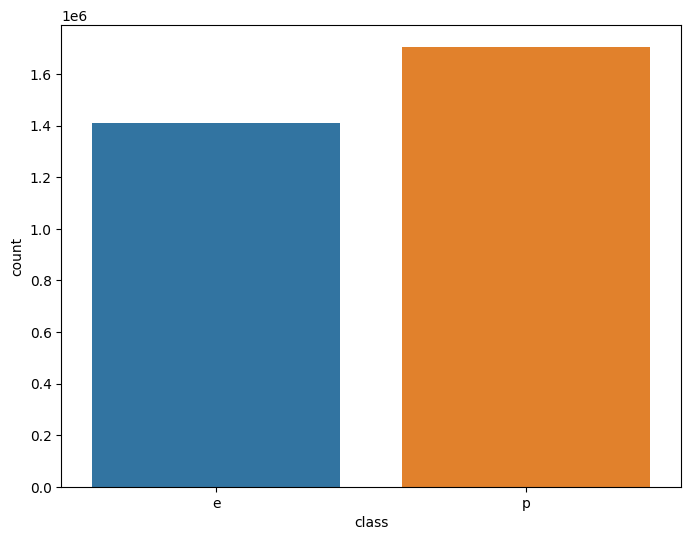

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='class')
plt.show()

In [11]:
list(train['gill-attachment'].value_counts())

[646034,
 589236,
 360878,
 301858,
 295439,
 279110,
 119953,
 74,
 56,
 37,
 36,
 33,
 28,
 25,
 22,
 22,
 21,
 20,
 18,
 18,
 16,
 10,
 5,
 5,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

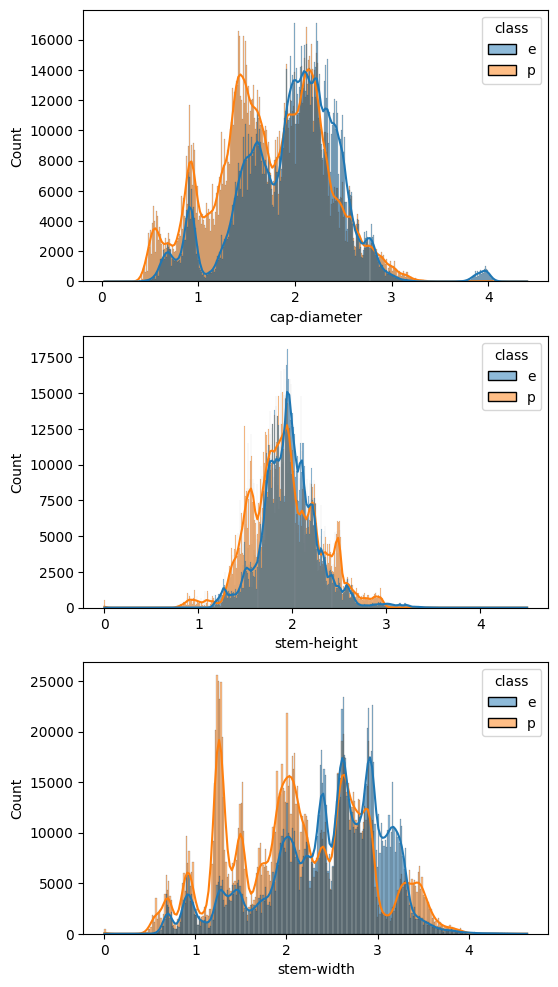

In [12]:
plt.figure(figsize=(6,12))
for i, n in enumerate(num_cols, 1):
    plt.subplot(3,1,i)
    sns.histplot(data=train, x=np.log(1+train[n]), hue='class', kde=True)

plt.show()

In [13]:
cat_cols = cat_cols.drop('class')

In [14]:
print(cat_cols)

Index(['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
       'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
       'ring-type', 'spore-print-color', 'habitat', 'season'],
      dtype='object')


In [15]:
for c in cat_cols:
    value_counts = train[c].value_counts()
    to_replace = value_counts[value_counts<100].index
    train[c] = train[c].replace(to_replace, 'unique')
    value_counts = test[c].value_counts()
    to_replace = value_counts[value_counts<100].index
    test[c] = test[c].replace(to_replace, 'unique')

In [16]:
train.select_dtypes('object').describe()

class cap-shape cap-surface cap-color does-bruise-or-bleed  \
count   3116945   3116905     2445922   3116933              3116937   
unique        2         8          12        13                    3   
top           p         x           t         n                    f   
freq    1705396   1436026      460777   1359542              2569743   

       gill-attachment gill-spacing gill-color stem-root stem-surface  \
count          2593009      1858510    3116888    359922      1136084   
unique               8            4         13         6            9   
top                  a            c          w         b            s   
freq            646034      1331054     931538    165801       327610   

       stem-color veil-type veil-color has-ring ring-type spore-print-color  \
count     3116907    159452     375998  3116921   2988065            267263   
unique         14         2          7        3         9                 8   
top             w         u          w        f         f                 k   
freq      1196637    159373     279070  2368820   2477170            107310   

        habitat   season  
count   3116900  3116945  
unique        9        4  
top           d        a  
freq    2177573  1543321

In [17]:
train.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [18]:
# Missing values summary
cols=train.columns.tolist()
mv=pd.DataFrame(train[cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train),2)
mv

Number_missing  Percentage_missing
id                                 0                0.00
class                              0                0.00
cap-diameter                       4                0.00
cap-shape                         40                0.00
cap-surface                   671023               21.53
cap-color                         12                0.00
does-bruise-or-bleed               8                0.00
gill-attachment               523936               16.81
gill-spacing                 1258435               40.37
gill-color                        57                0.00
stem-height                        0                0.00
stem-width                         0                0.00
stem-root                    2757023               88.45
stem-surface                 1980861               63.55
stem-color                        38                0.00
veil-type                    2957493               94.88
veil-color                   2740947               87.94
has-ring                          24                0.00
ring-type                     128880                4.13
spore-print-color            2849682               91.43
habitat                           45                0.00
season                             0                0.00

In [19]:
mv_filtered = mv[mv['Percentage_missing'] > 20]
remove_cols = mv_filtered.index.tolist()
train = train.drop(remove_cols, axis=1)
test = test.drop(remove_cols, axis=1)
data = pd.concat([train, test], axis=0).reset_index(drop=True)

In [20]:
train.head()

id class  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
0   0     e          8.80         f         u                    f   
1   1     p          4.51         x         o                    f   
2   2     e          6.94         f         b                    f   
3   3     e          3.88         f         g                    f   
4   4     e          5.85         x         w                    f   

  gill-attachment gill-color  stem-height  stem-width stem-color has-ring  \
0               a          w         4.51       15.39          w        f   
1               a          n         4.79        6.48          o        t   
2               x          w         6.85        9.93          n        f   
3               s          g         4.16        6.53          w        f   
4               d          w         3.37        8.36          w        f   

  ring-type habitat season  
0         f       d      a  
1         z       d      w  
2         f       l      w  
3         f       d      u  
4         f       g      a

In [21]:
# na_cols=train.columns[train.isna().any()].tolist()
# # Heatmap of missing values
# plt.figure(figsize=(12,6))
# sns.heatmap(train[na_cols].isna().T, cmap='summer')
# plt.title('Heatmap of missing values')

In [22]:
data = pd.concat([train, test], axis=0).reset_index(drop=True)
data.head()

id class  cap-diameter cap-shape cap-color does-bruise-or-bleed  \
0   0     e          8.80         f         u                    f   
1   1     p          4.51         x         o                    f   
2   2     e          6.94         f         b                    f   
3   3     e          3.88         f         g                    f   
4   4     e          5.85         x         w                    f   

  gill-attachment gill-color  stem-height  stem-width stem-color has-ring  \
0               a          w         4.51       15.39          w        f   
1               a          n         4.79        6.48          o        t   
2               x          w         6.85        9.93          n        f   
3               s          g         4.16        6.53          w        f   
4               d          w         3.37        8.36          w        f   

  ring-type habitat season  
0         f       d      a  
1         z       d      w  
2         f       l      w  
3         f       d      u  
4         f       g      a

In [23]:
data['cap-shape'].value_counts()

cap-shape
x         2393975
f         1128598
s          607844
b          530525
o          180807
p          178269
c          173956
unique        864
Name: count, dtype: int64

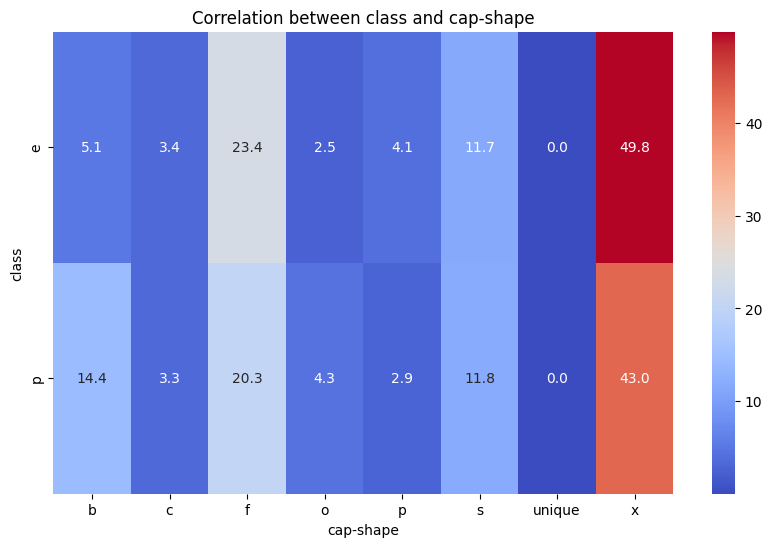

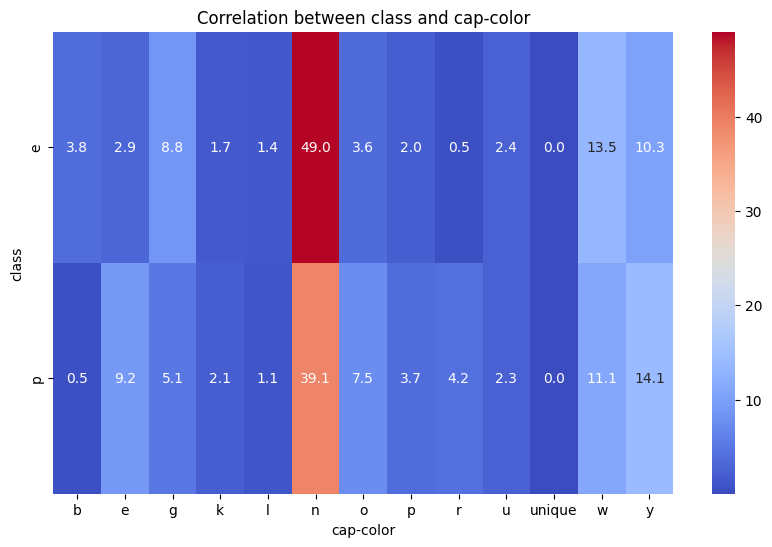

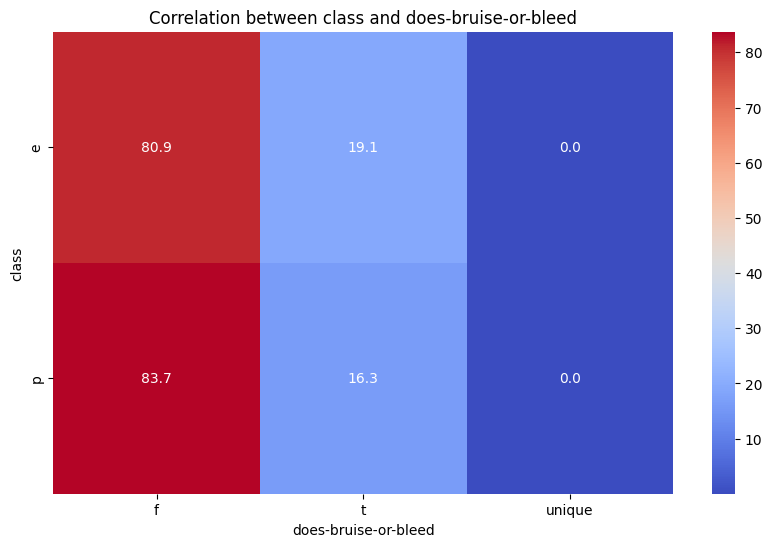

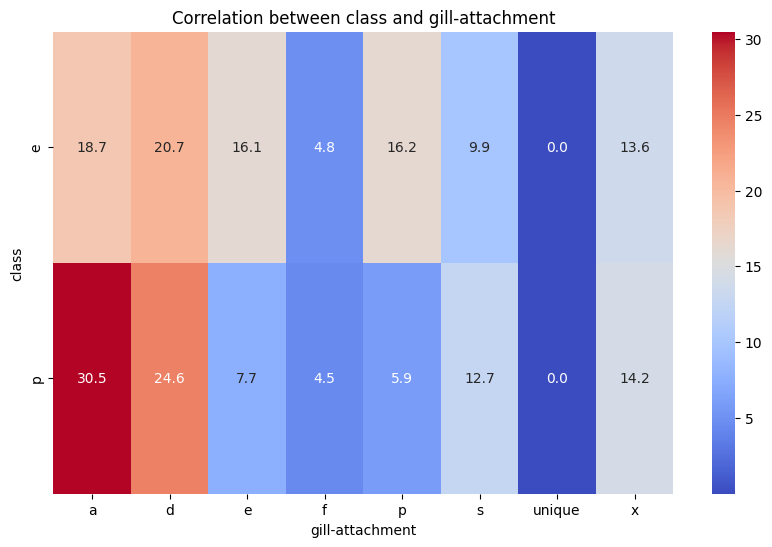

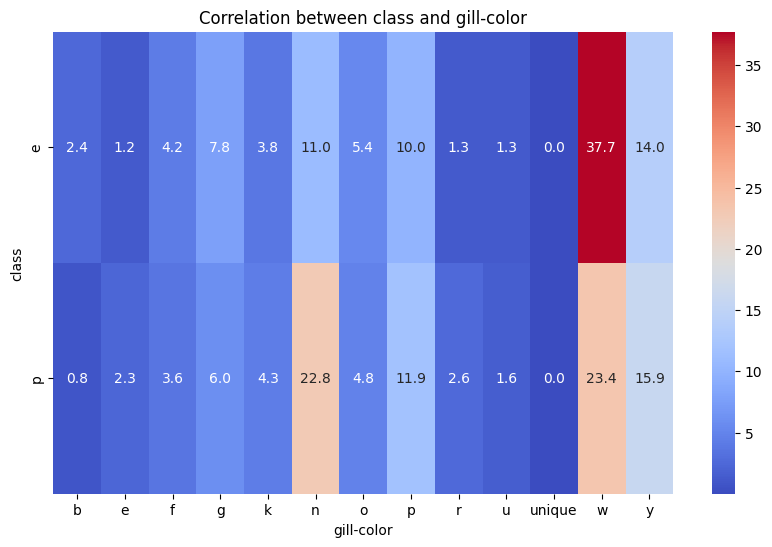

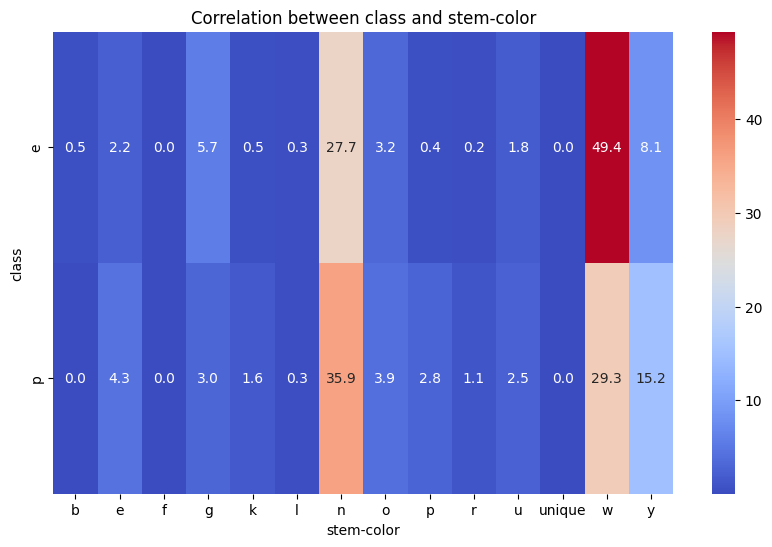

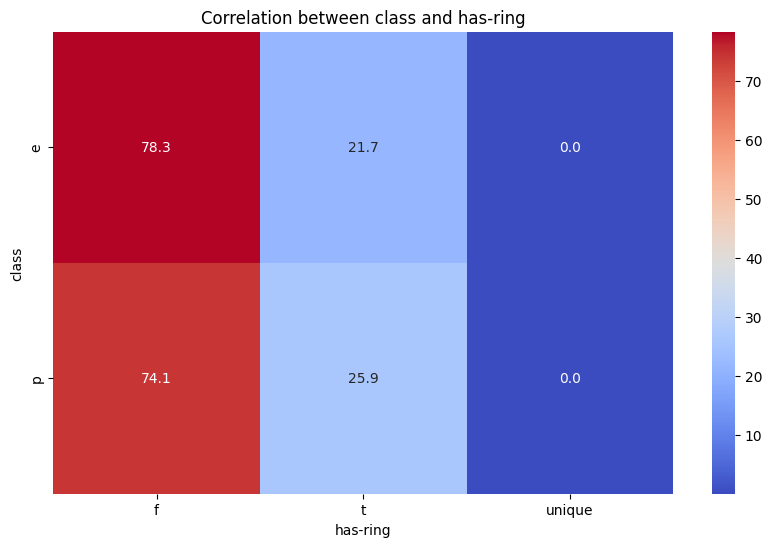

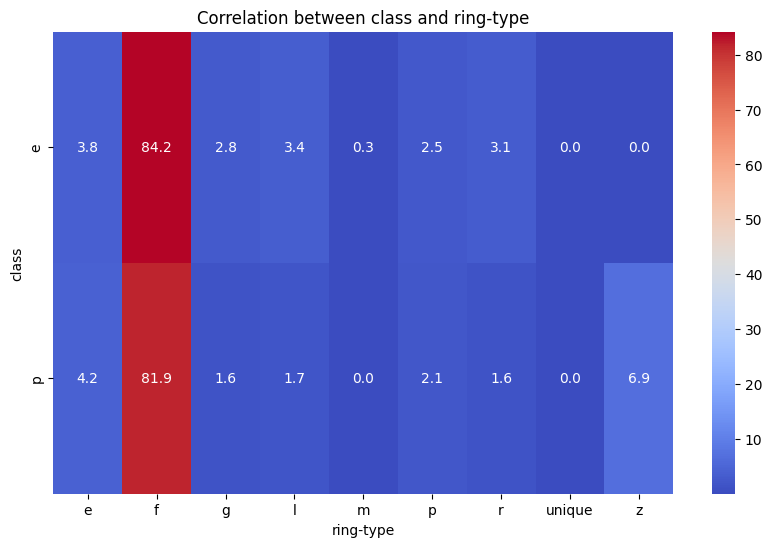

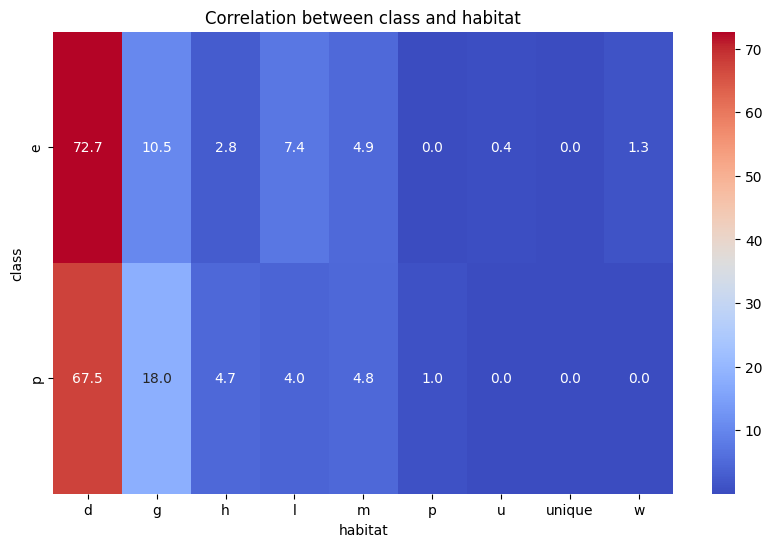

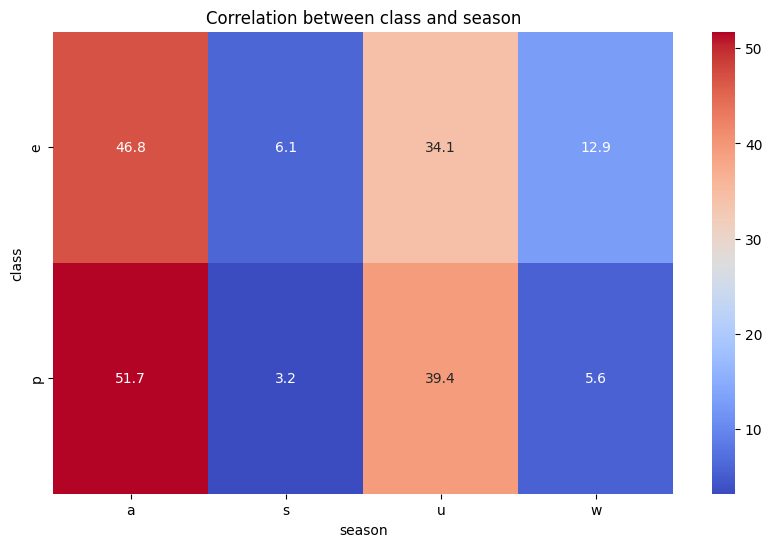

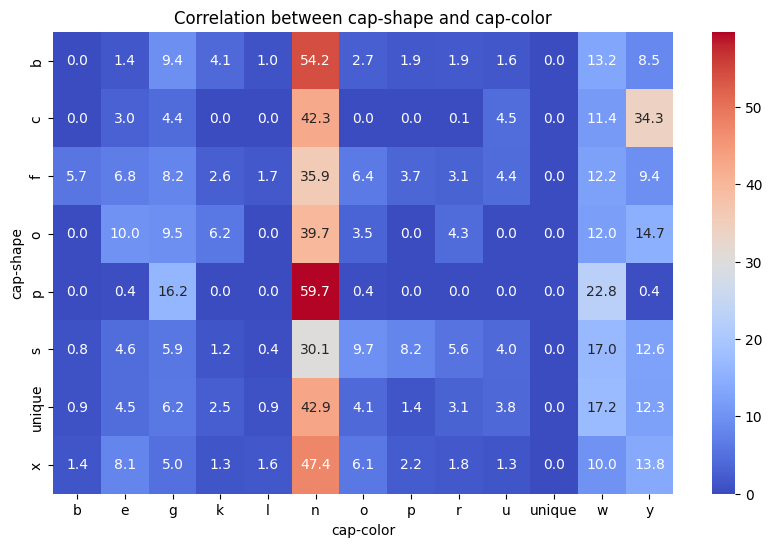

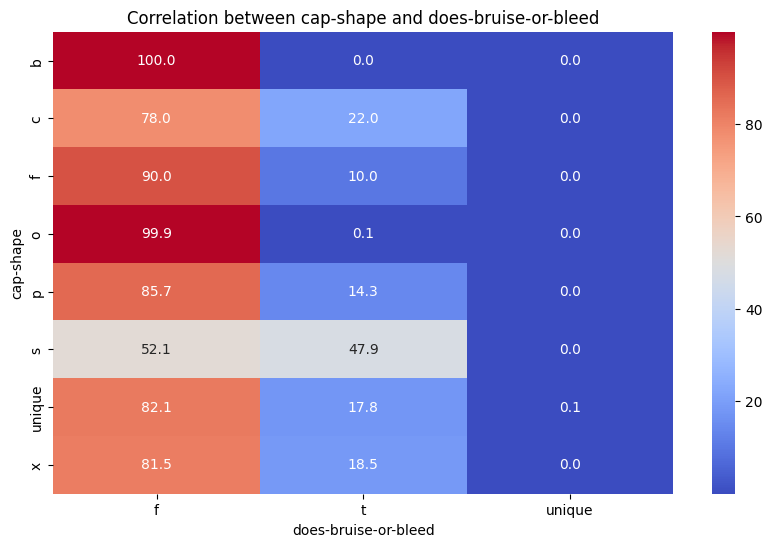

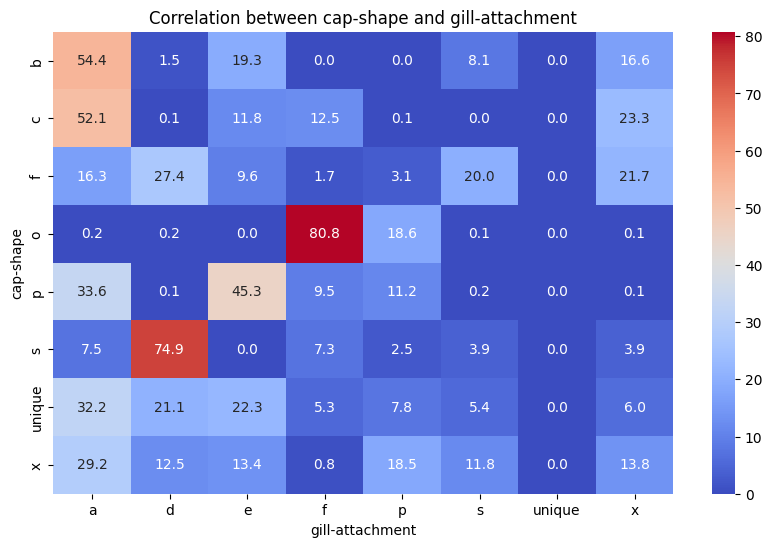

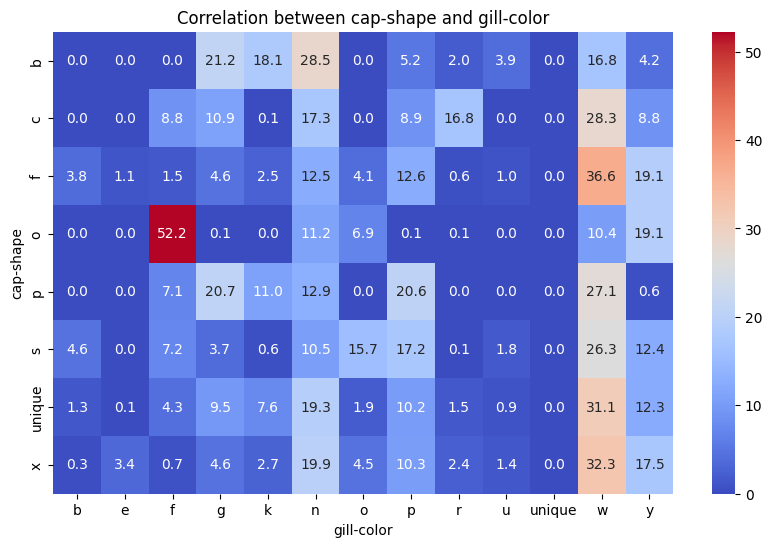

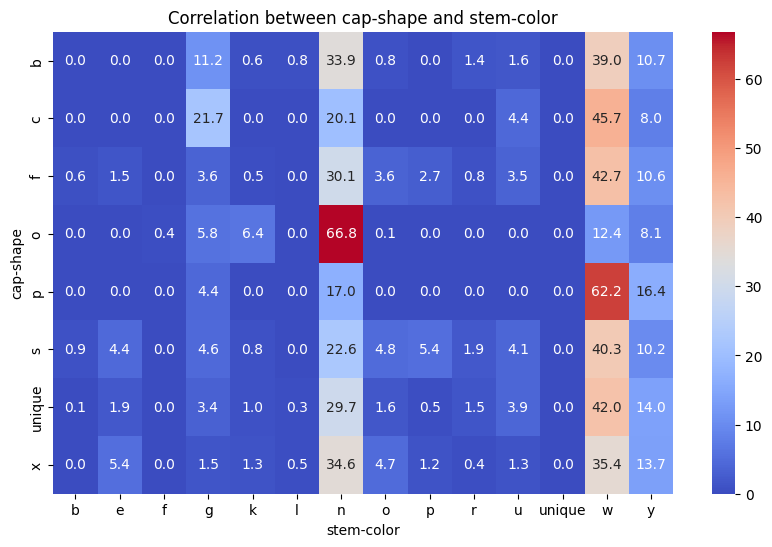

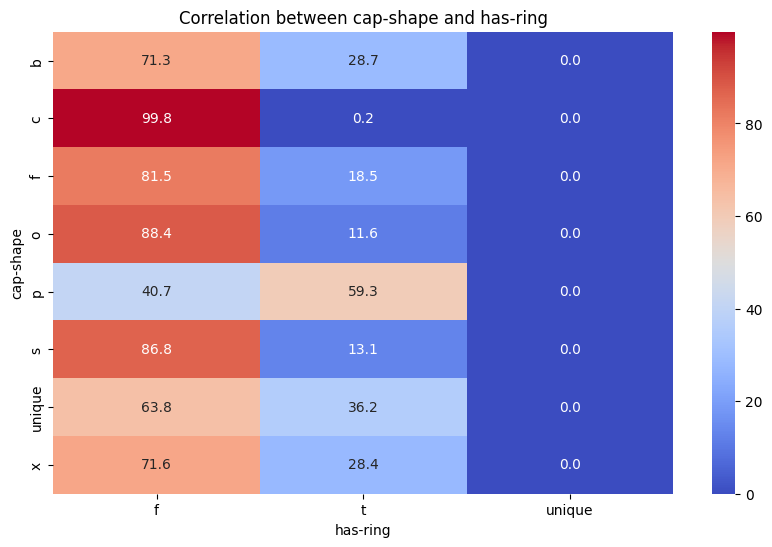

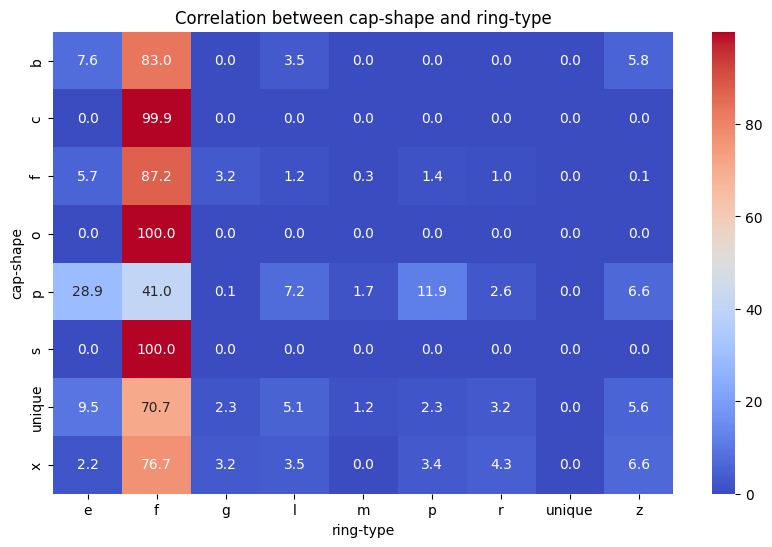

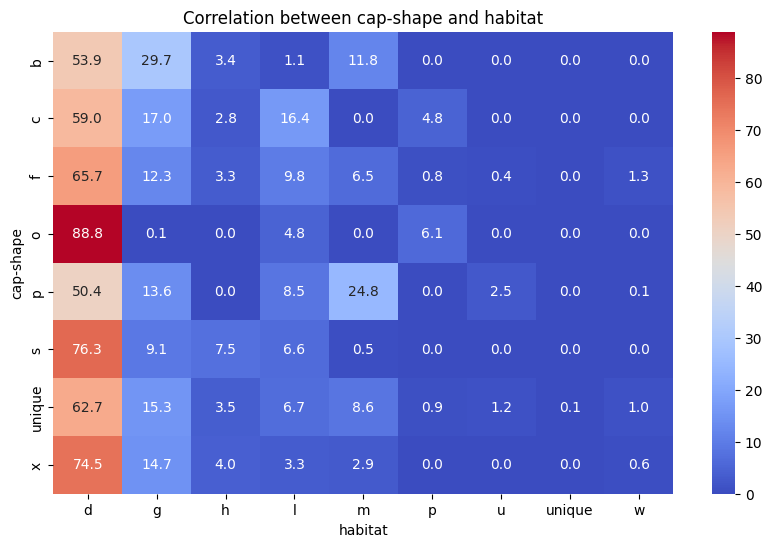

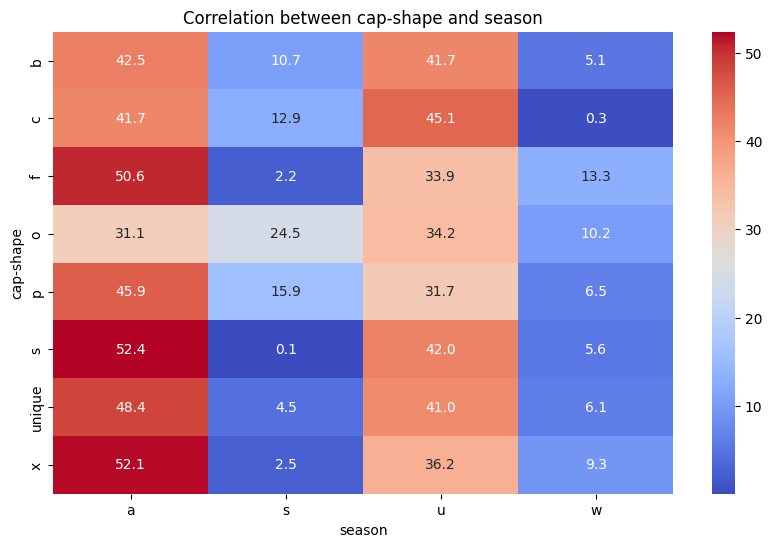

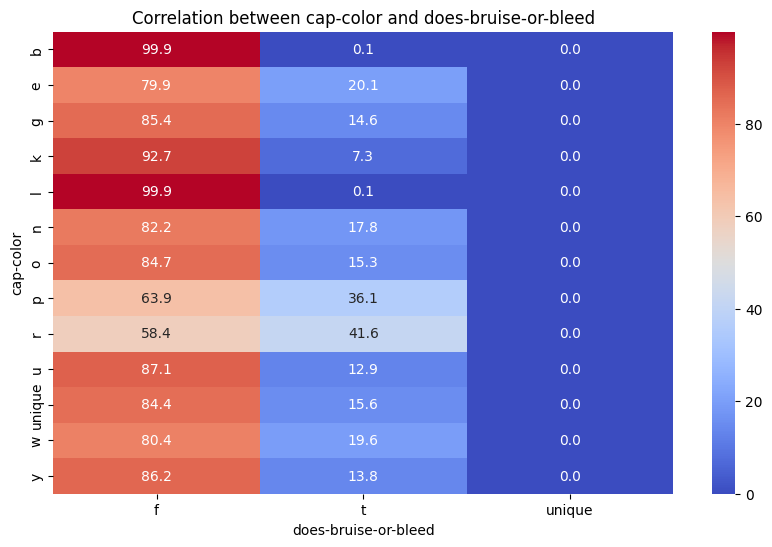

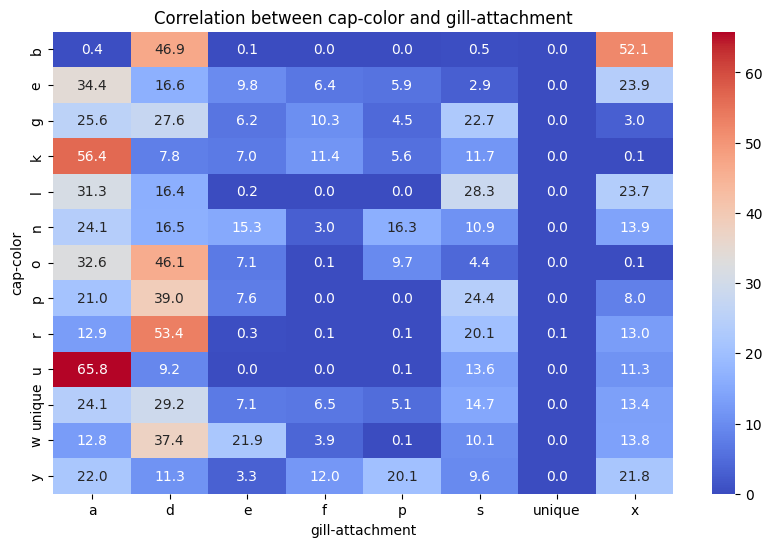

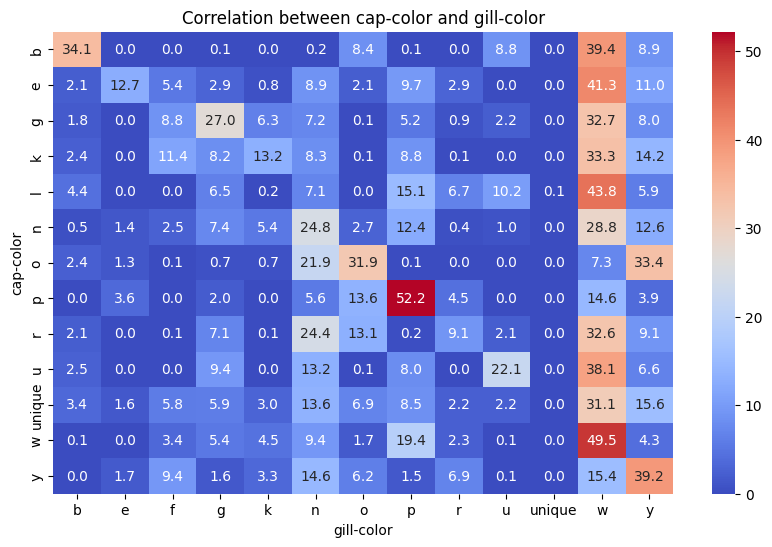

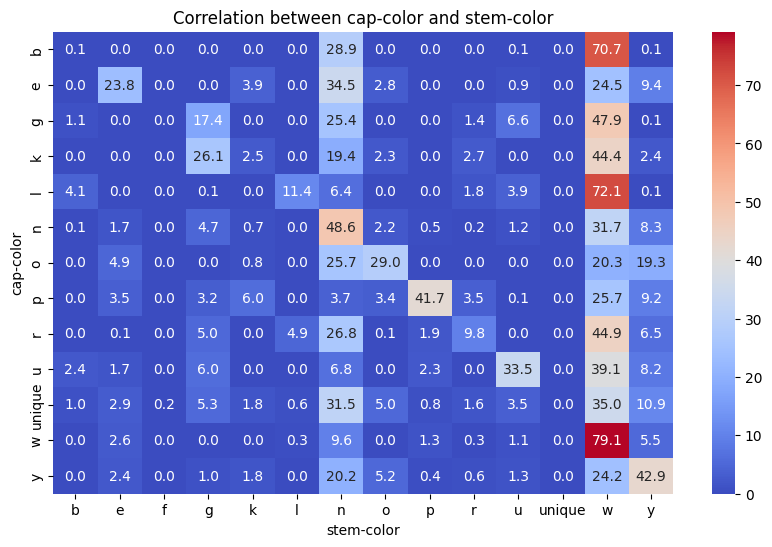

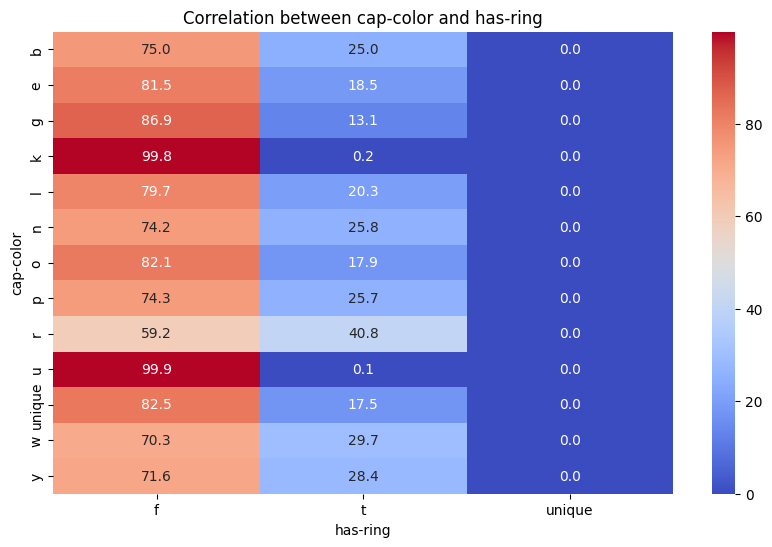

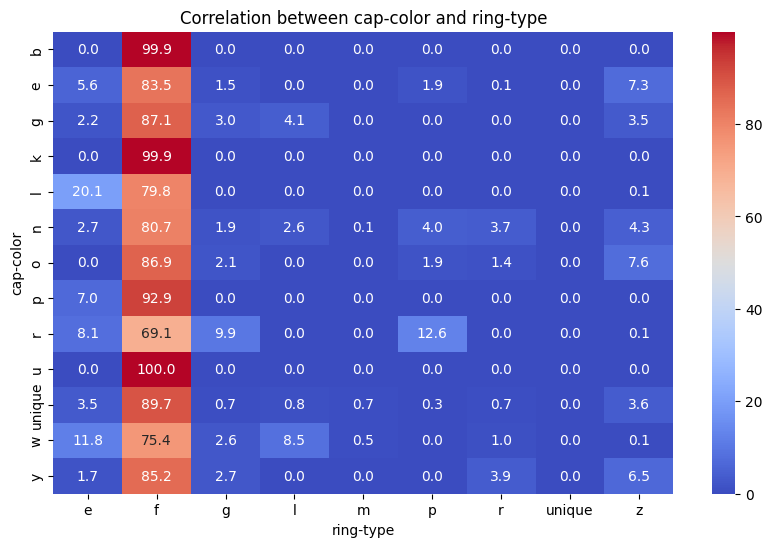

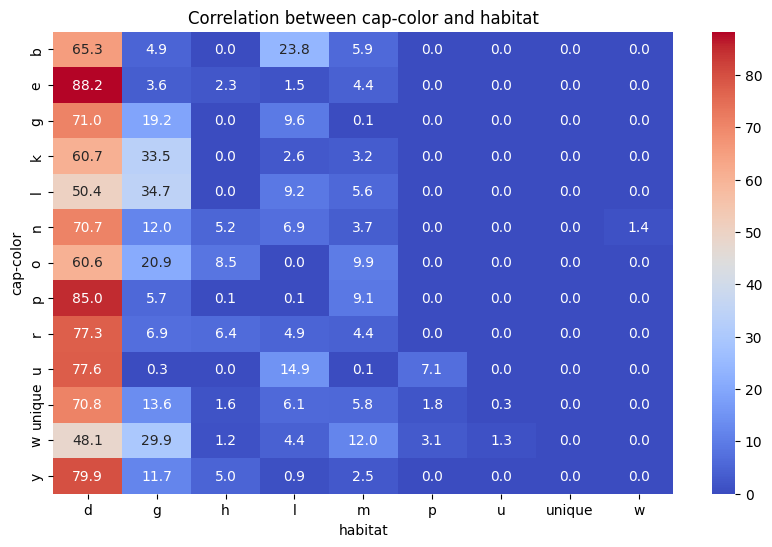

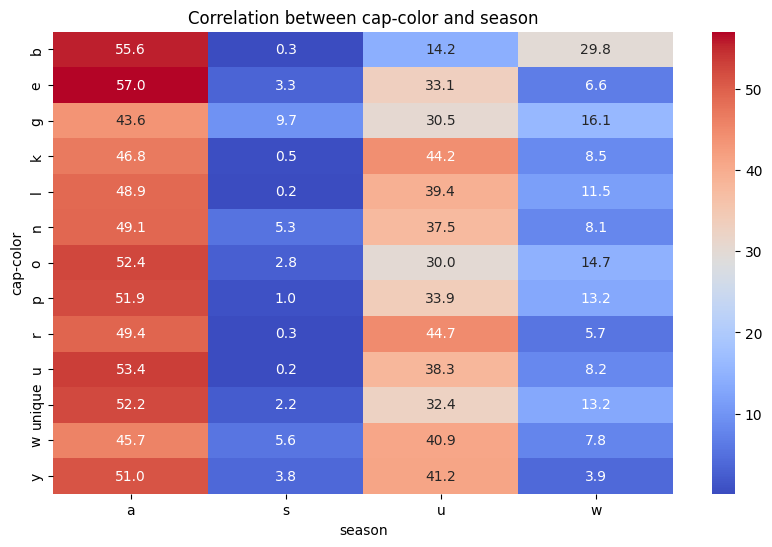

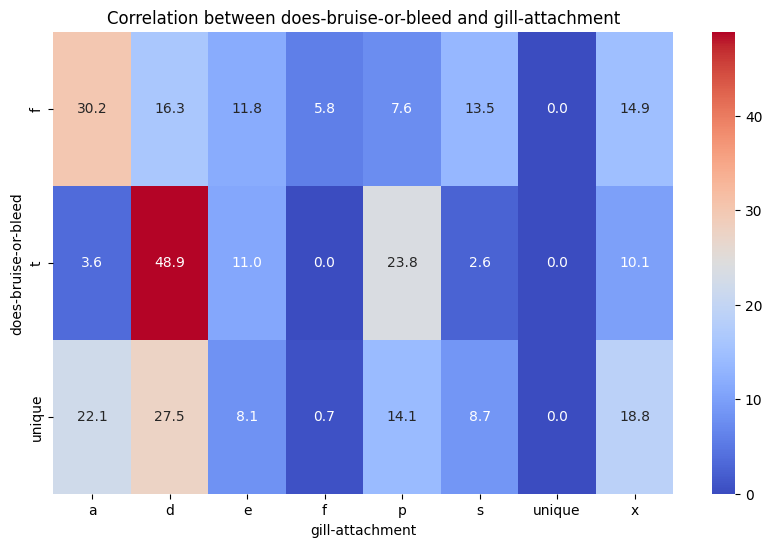

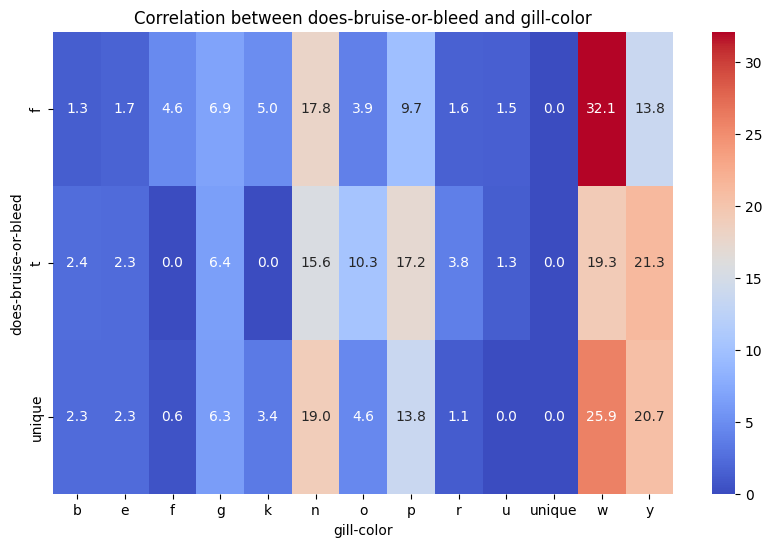

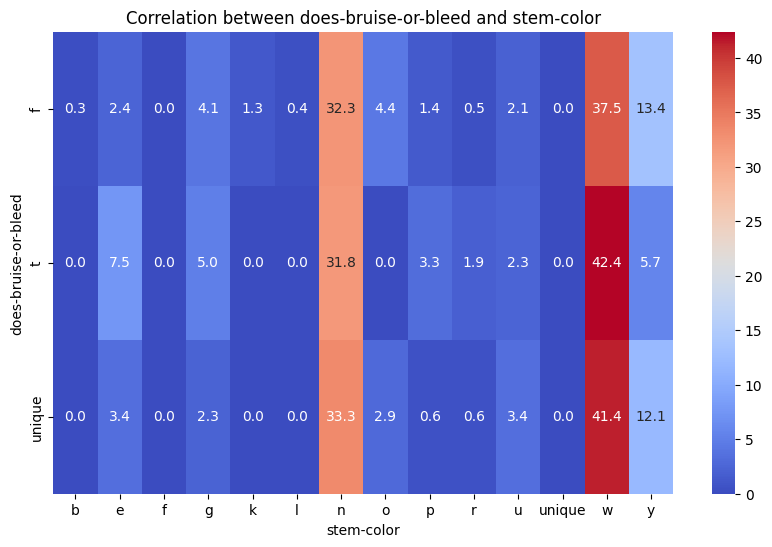

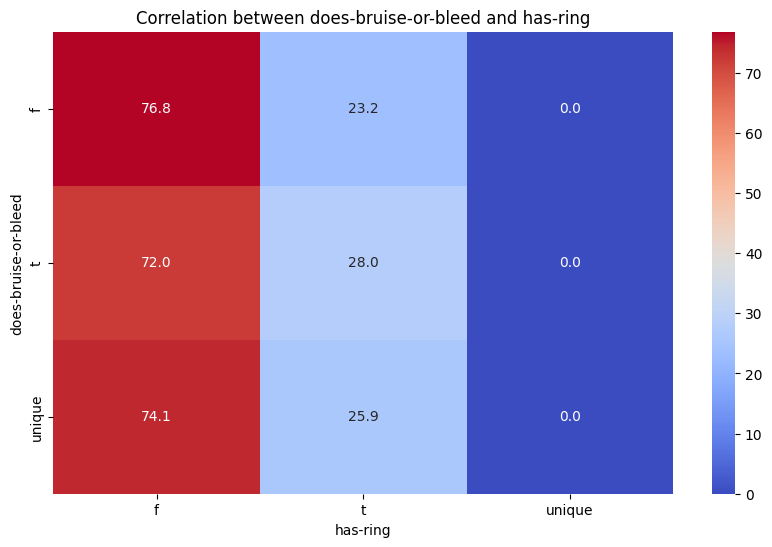

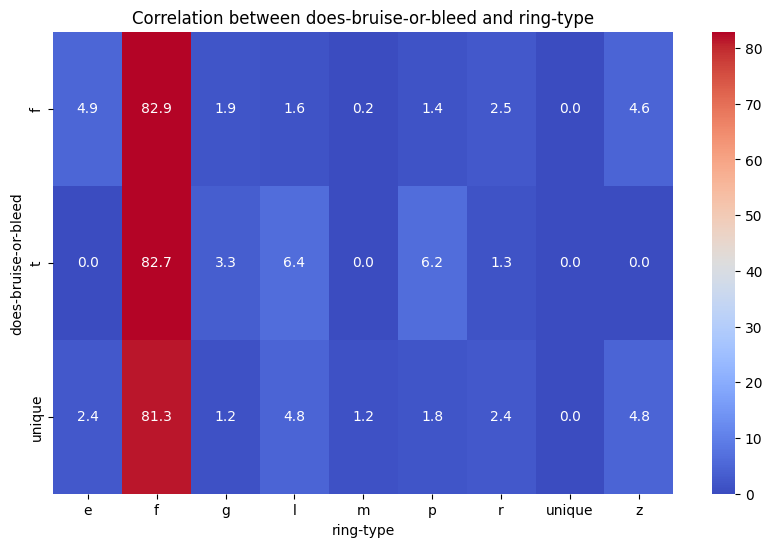

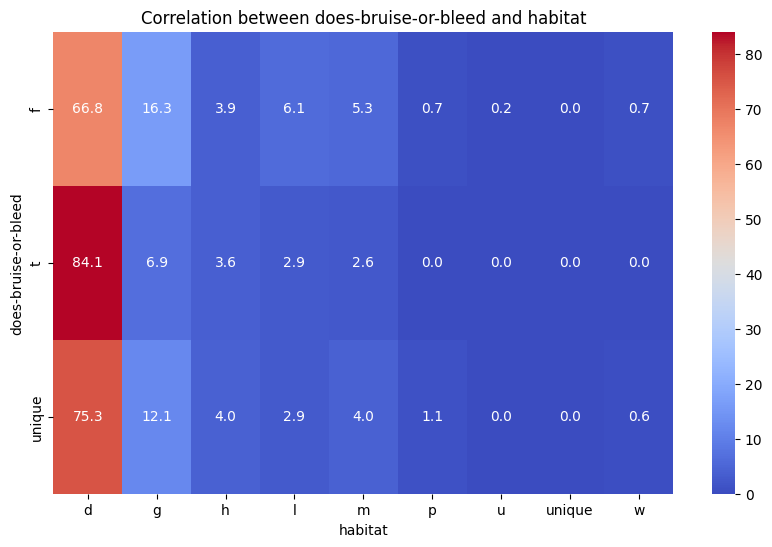

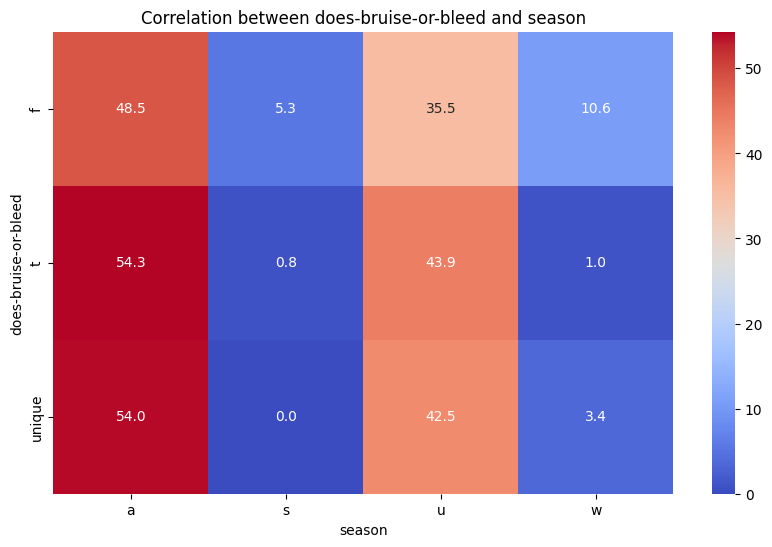

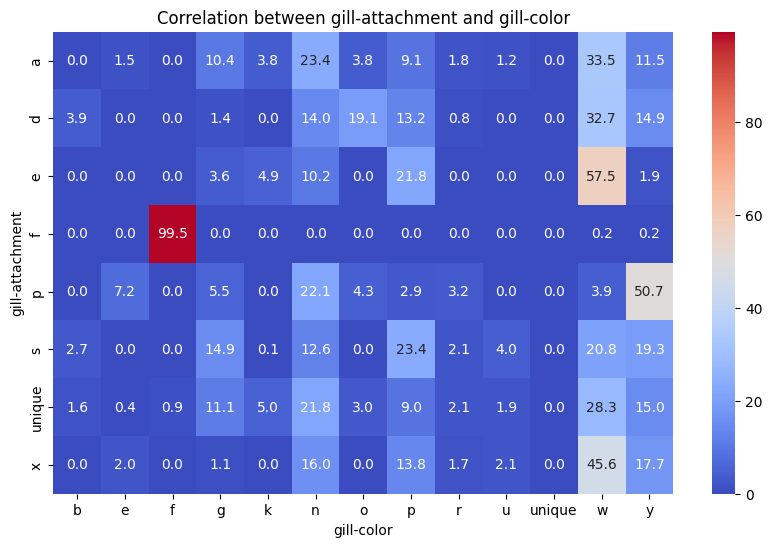

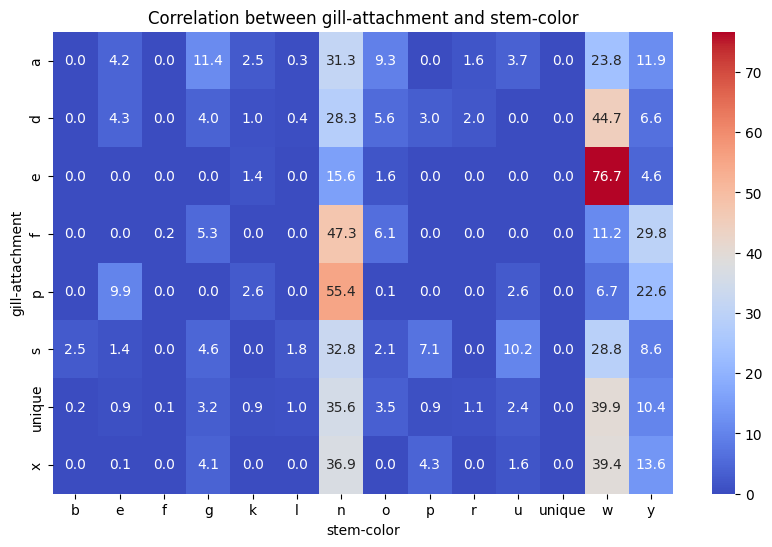

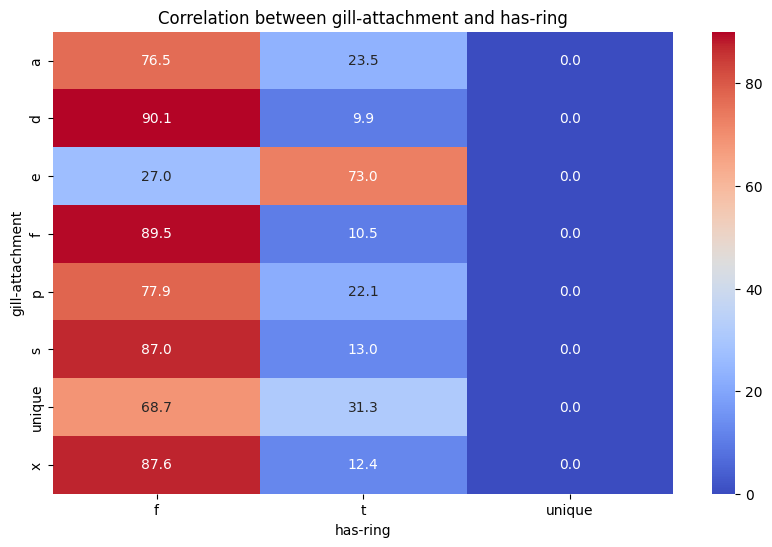

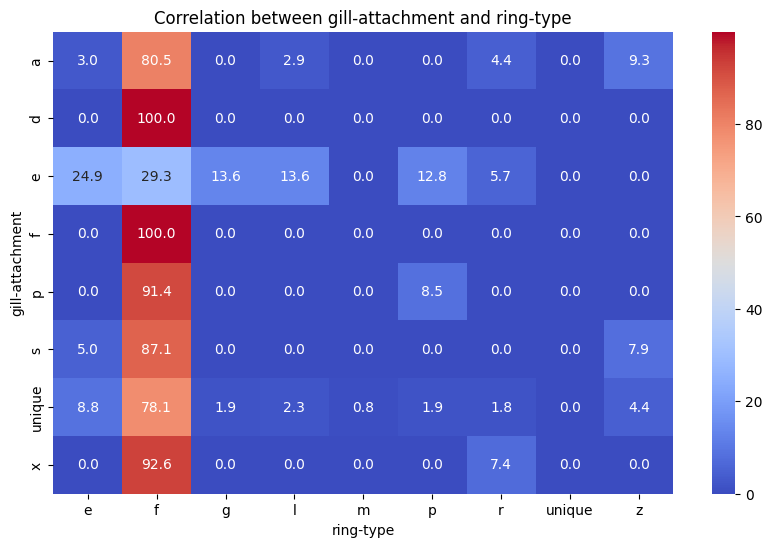

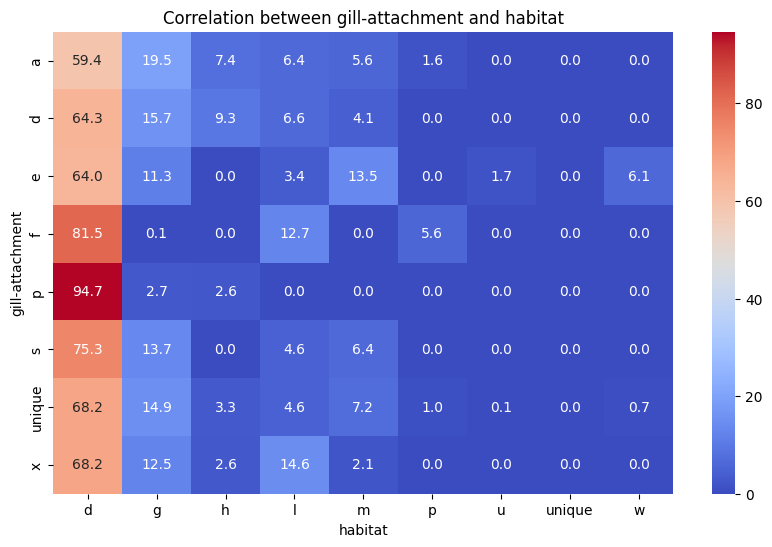

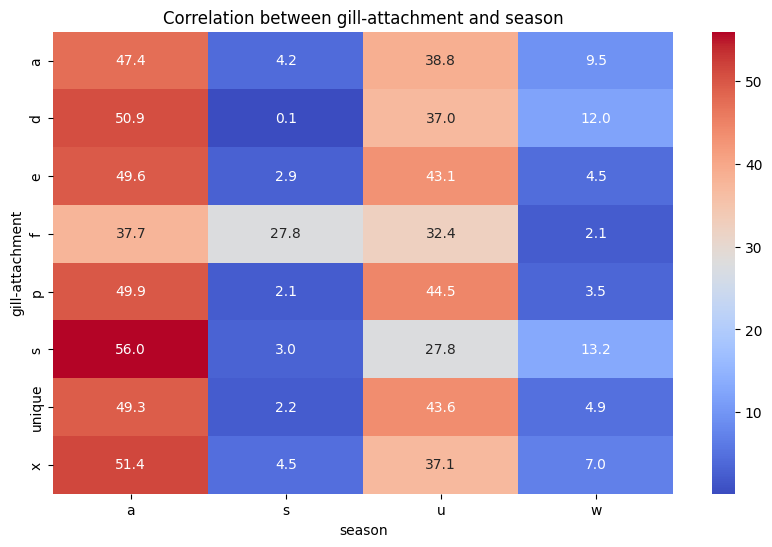

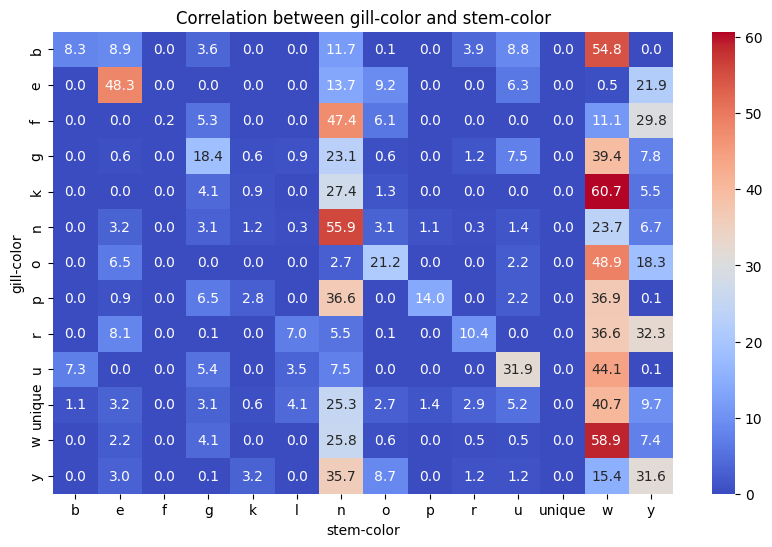

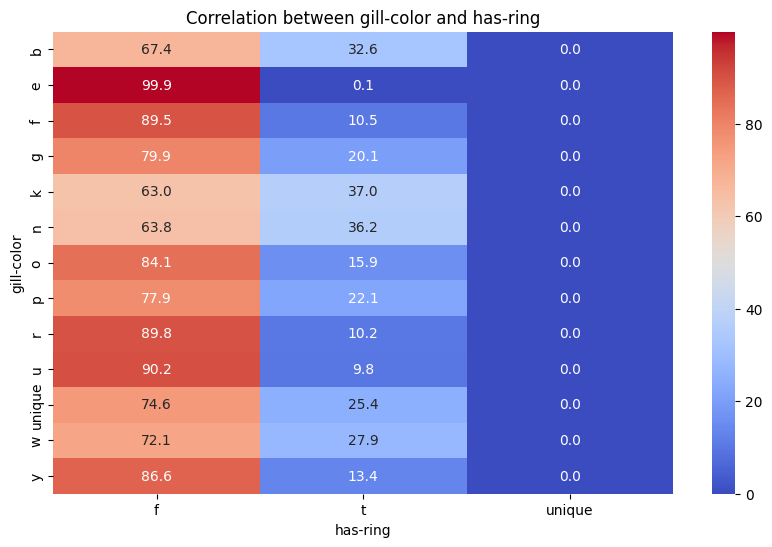

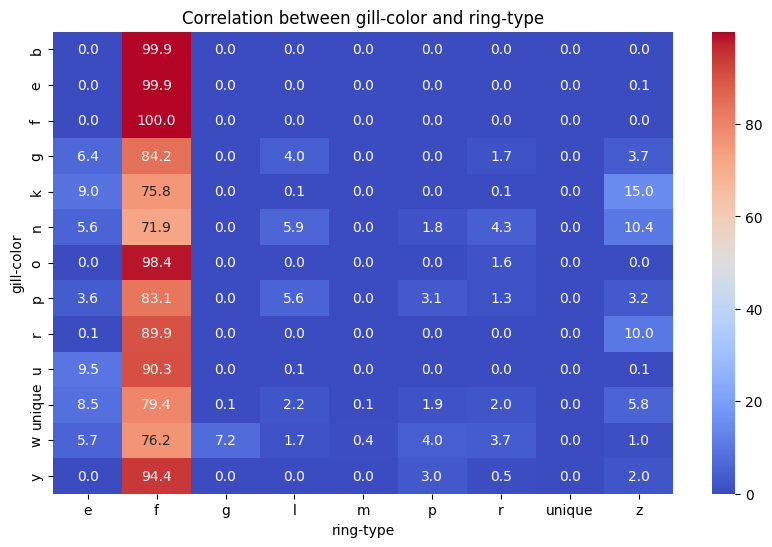

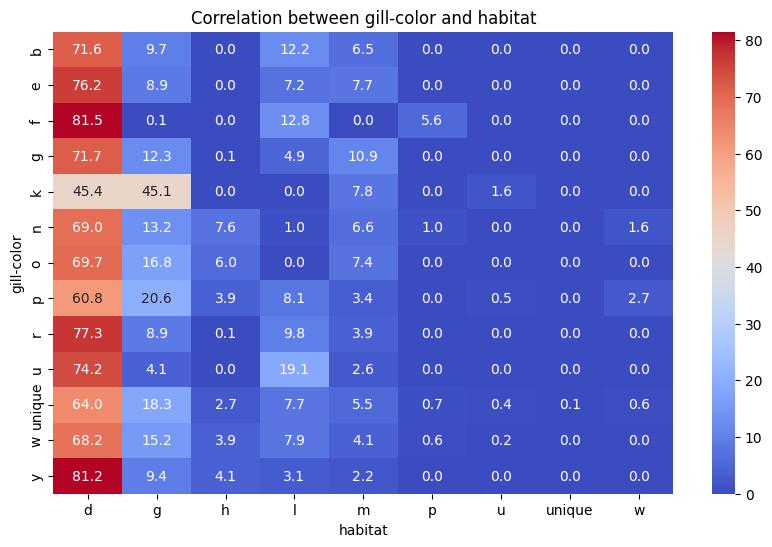

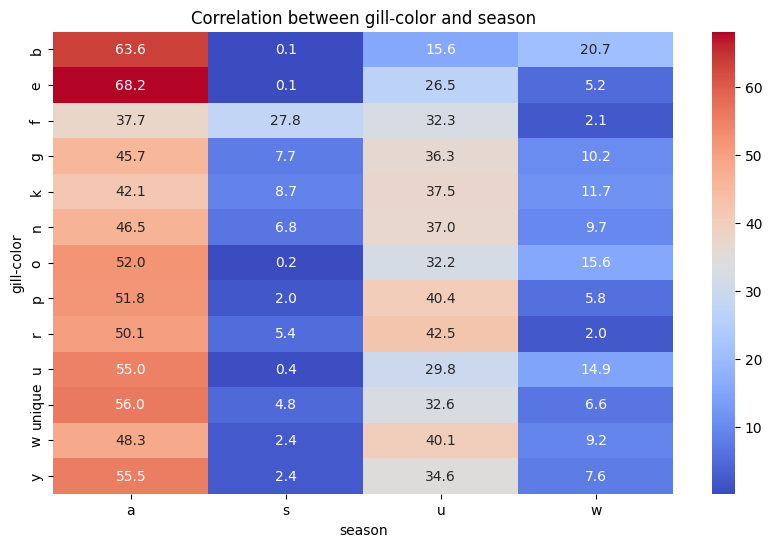

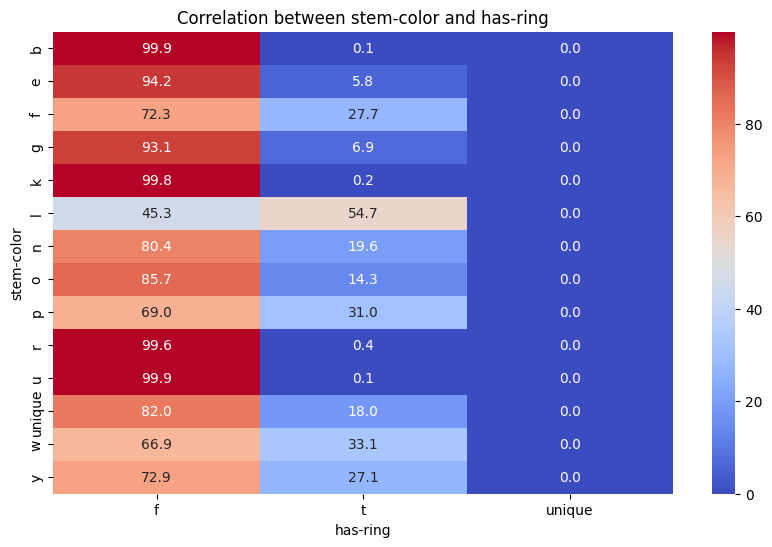

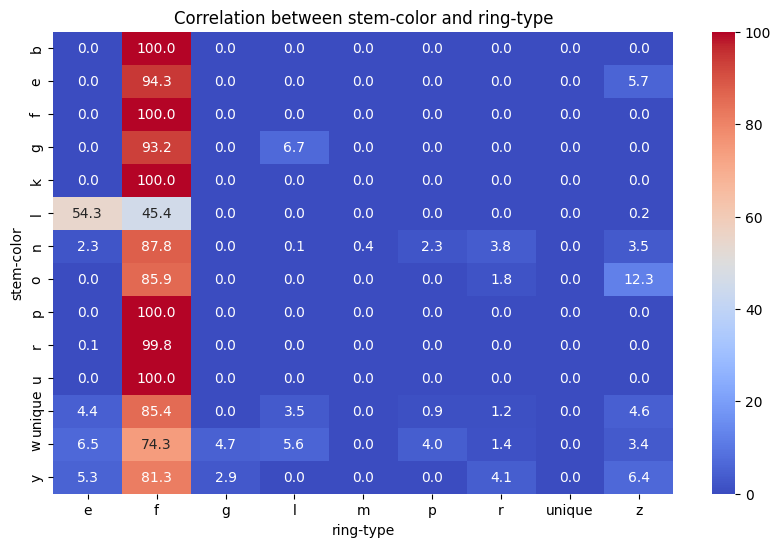

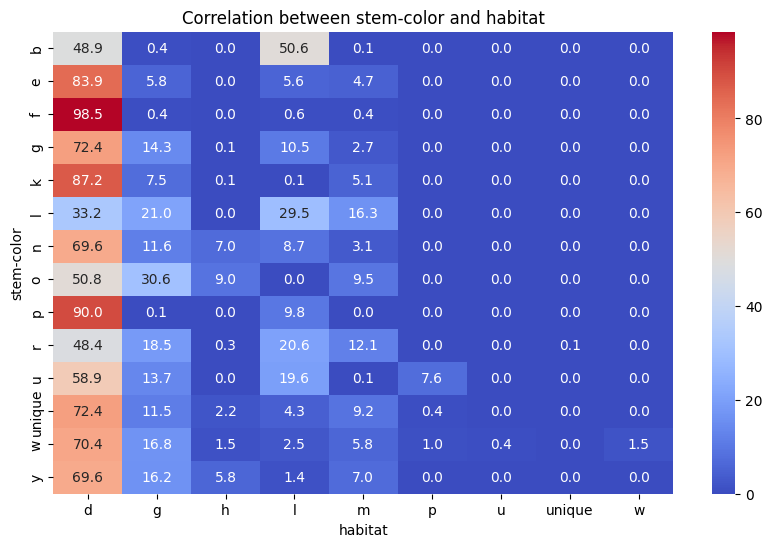

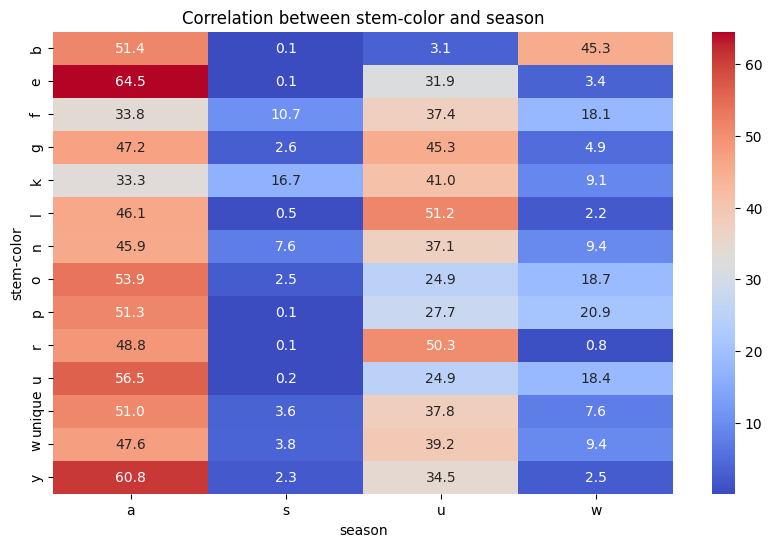

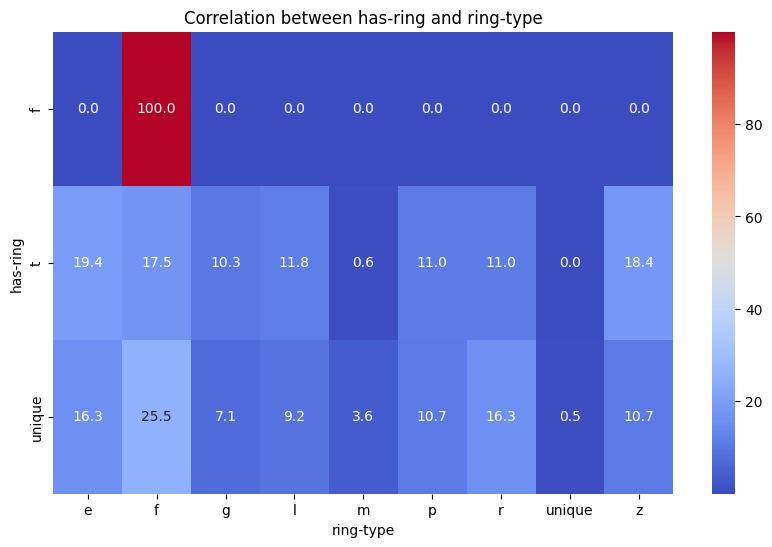

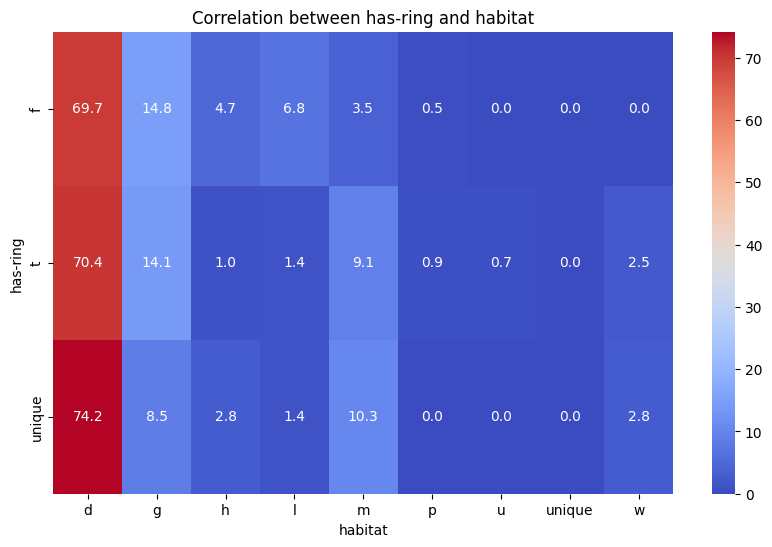

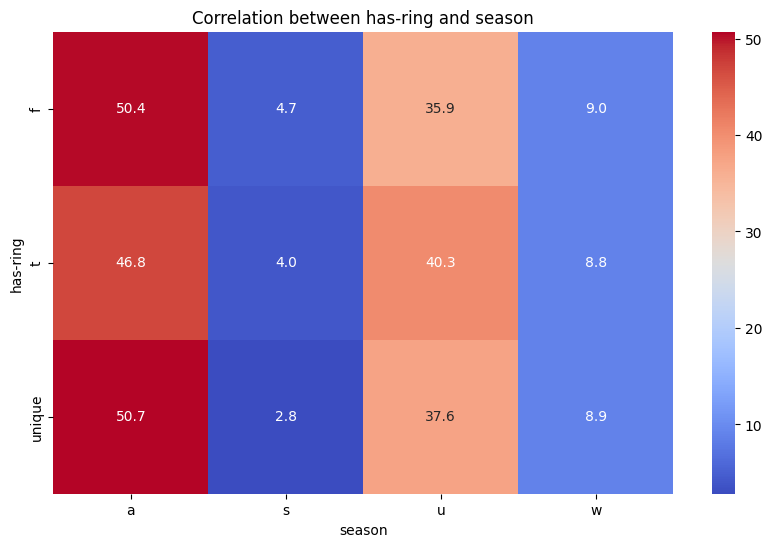

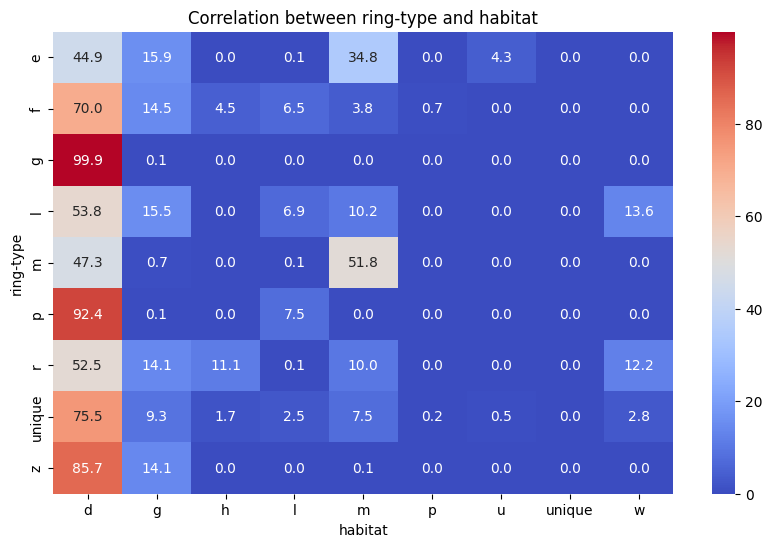

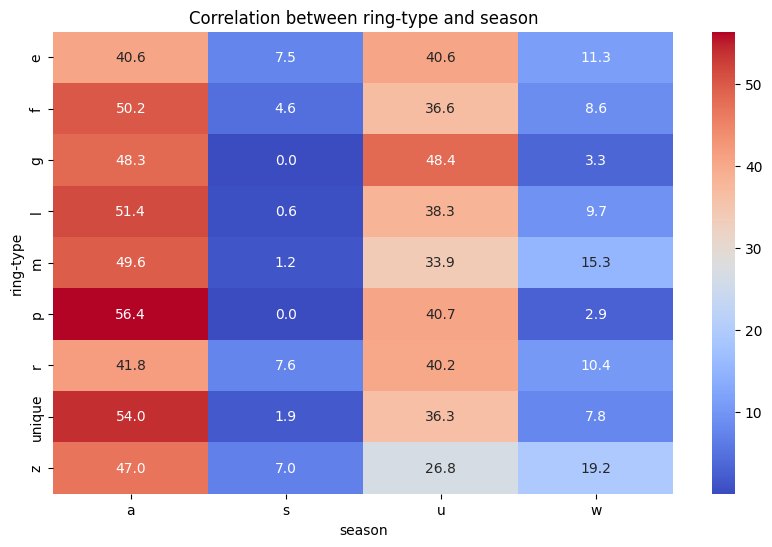

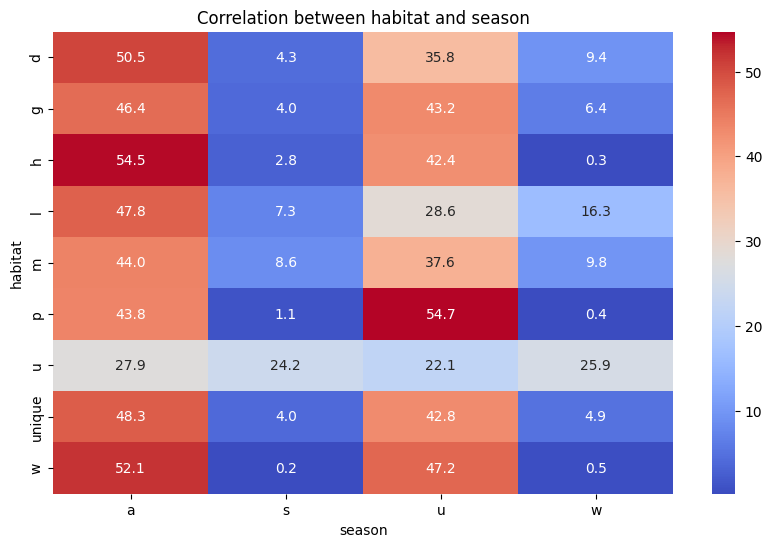

In [24]:
cat_cols = train.select_dtypes('object').columns
perfect_correlations = []
# Assuming `cat_cols` is your list of categorical columns
for i in range(len(cat_cols)):
    for j in range(i + 1, len(cat_cols)):
        col1, col2 = cat_cols[i], cat_cols[j]
        crosstab = pd.crosstab(data[col1], data[col2], normalize='index') * 100
                # Check for 100% correlations
        for row in crosstab.index:
            for col in crosstab.columns:
                if crosstab.loc[row, col] > 99:
                    perfect_correlations.append({
                        col1: row,
                        col2: col
                    })
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='.1f')
        plt.title(f'Correlation between {col1} and {col2}')
        plt.show()

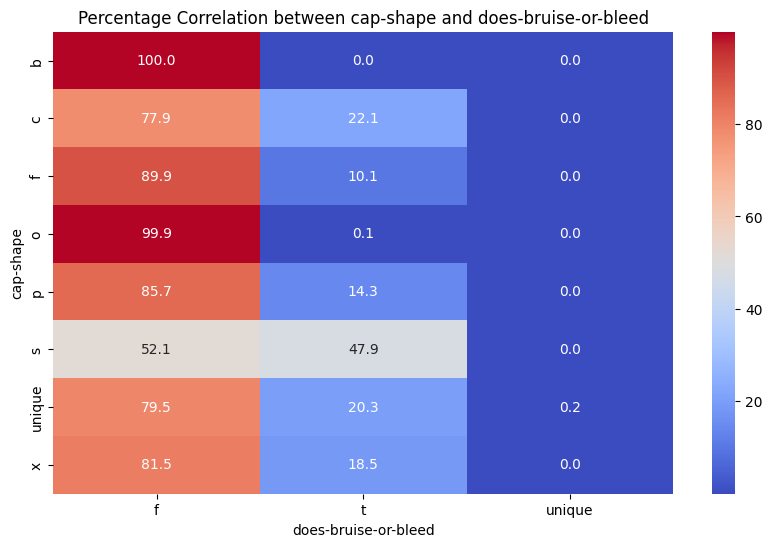

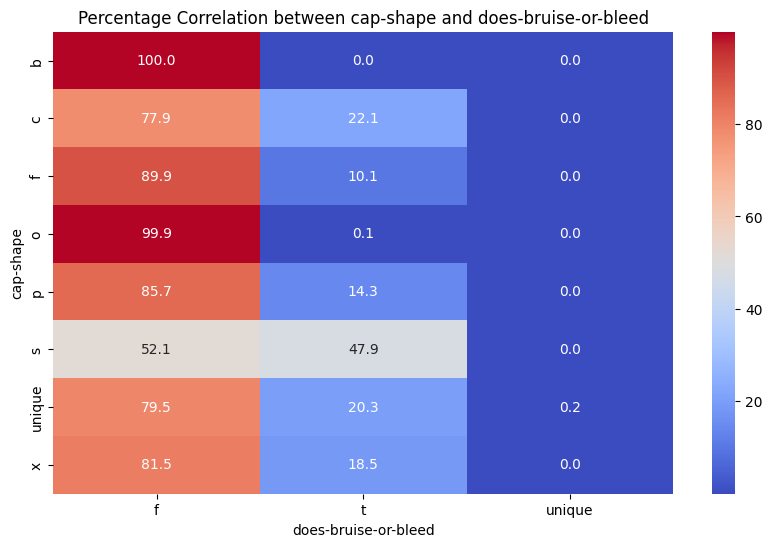

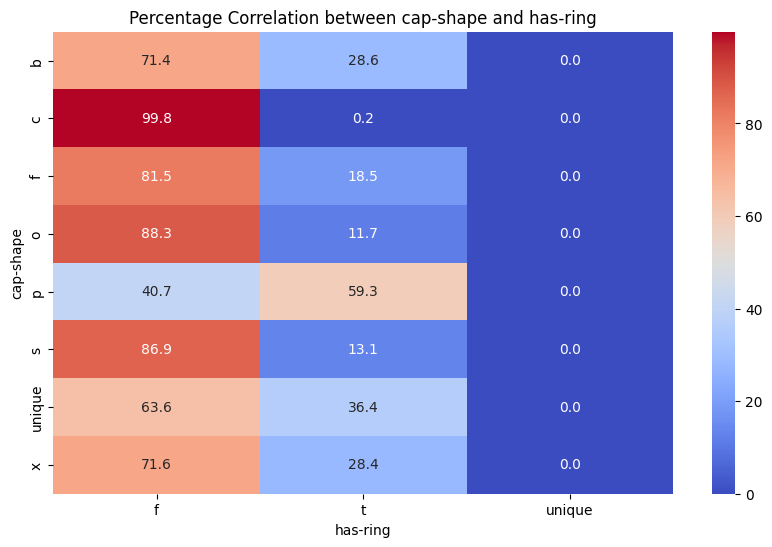

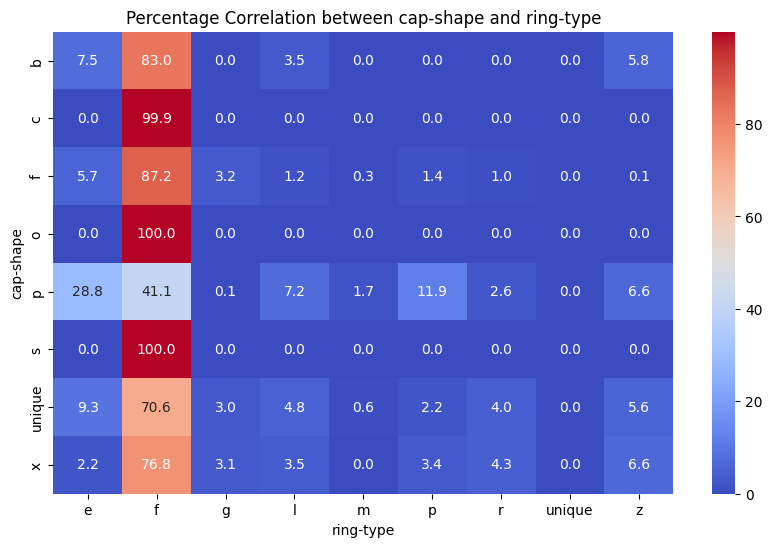

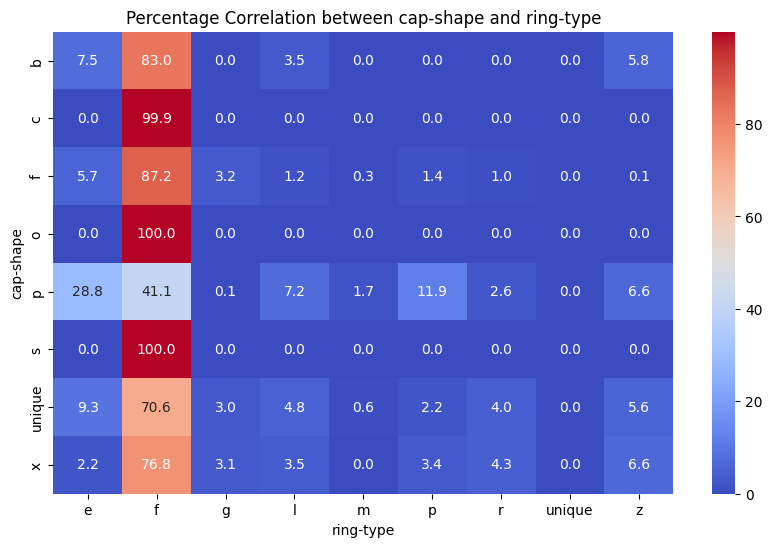

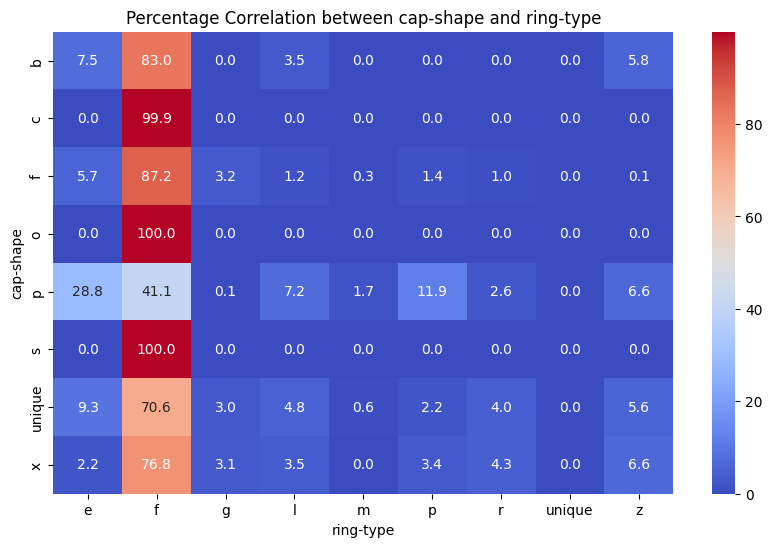

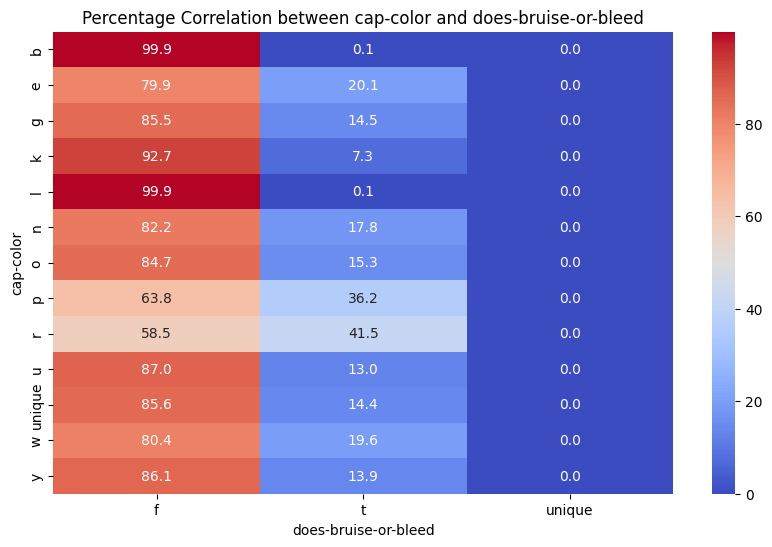

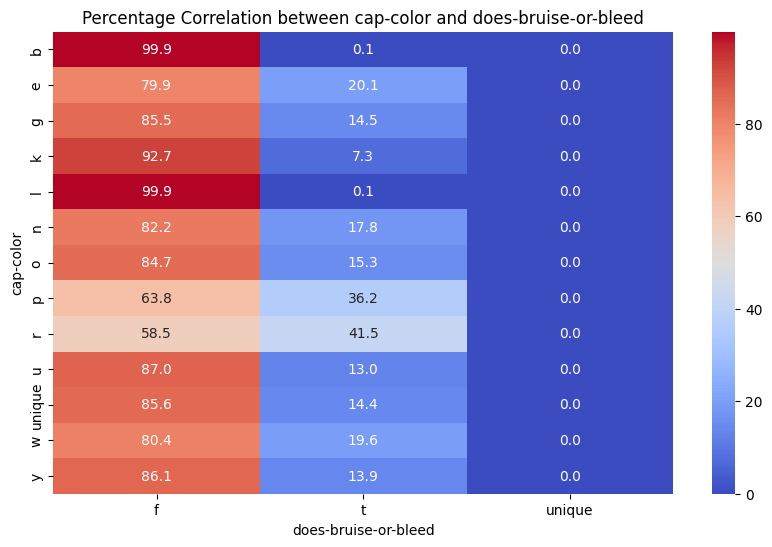

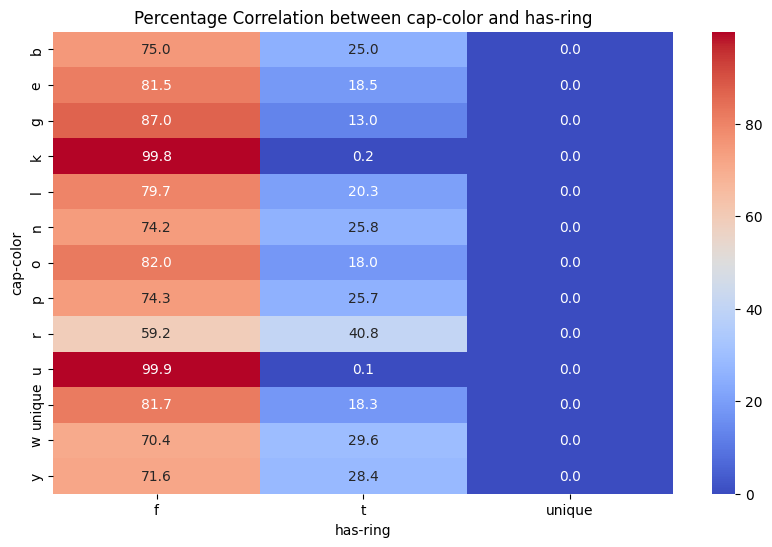

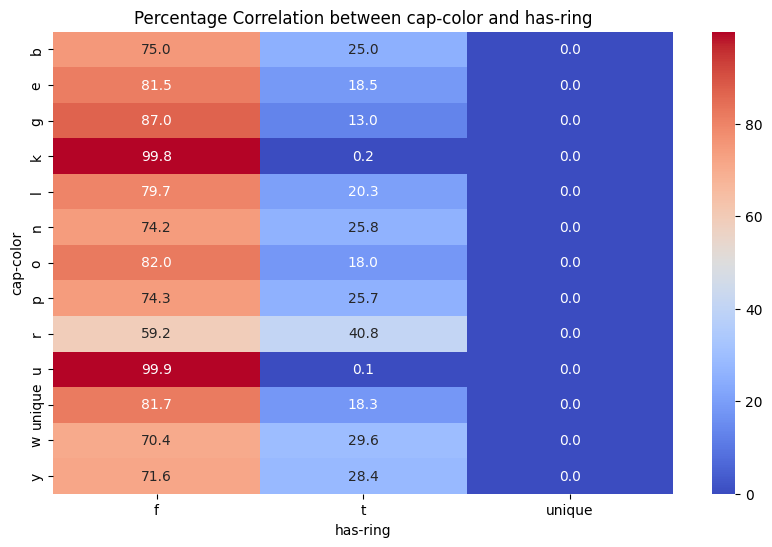

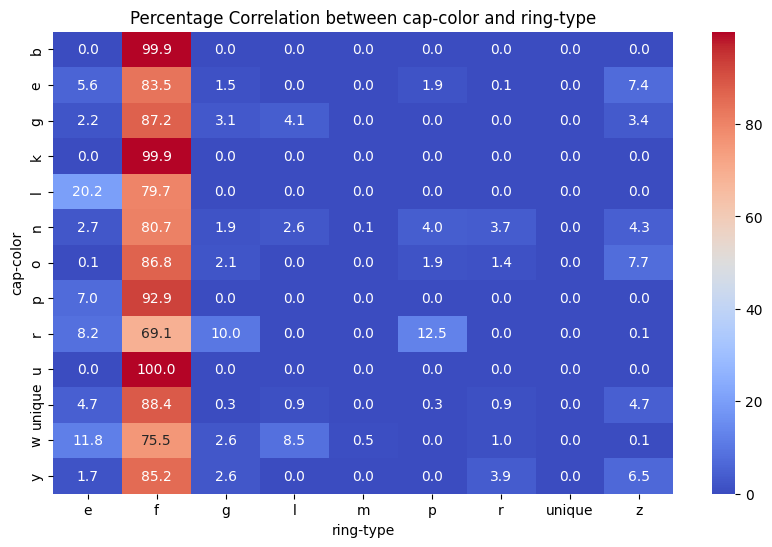

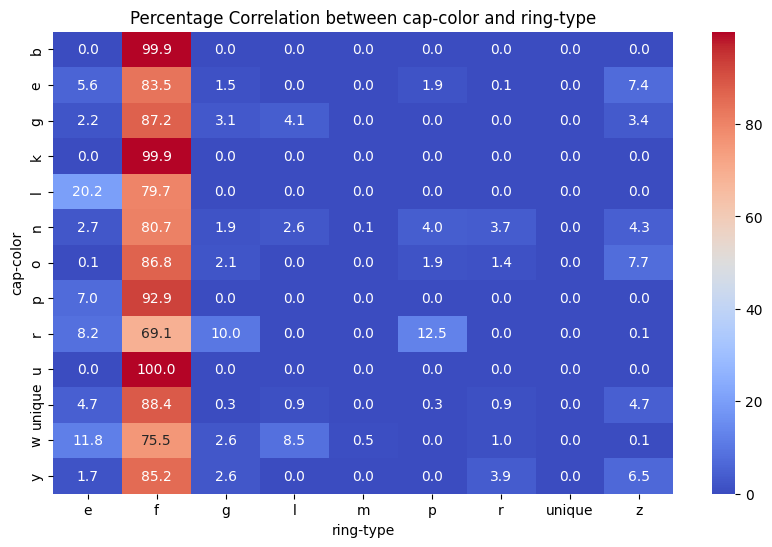

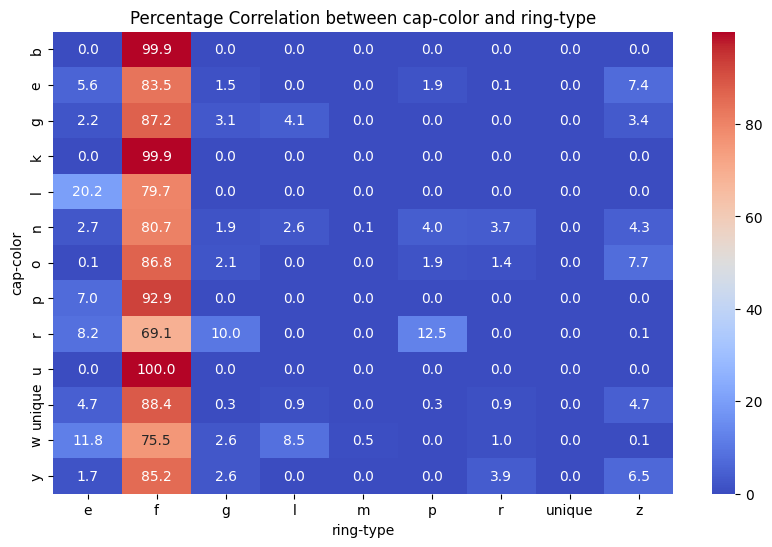

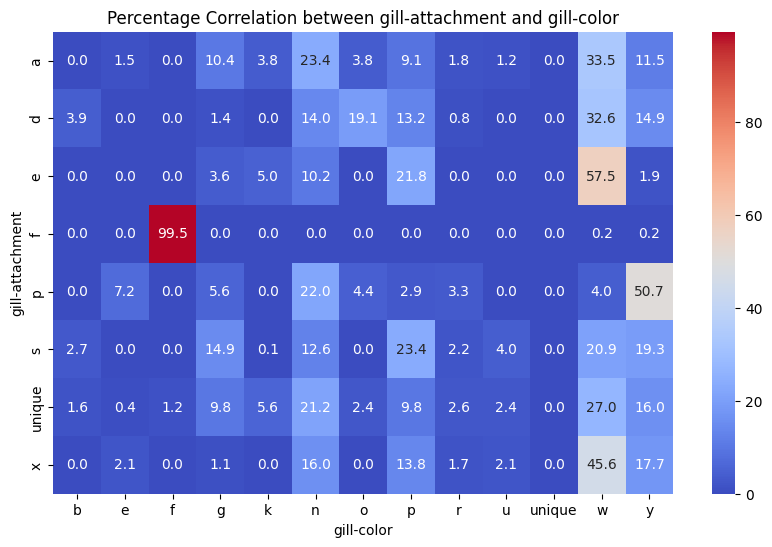

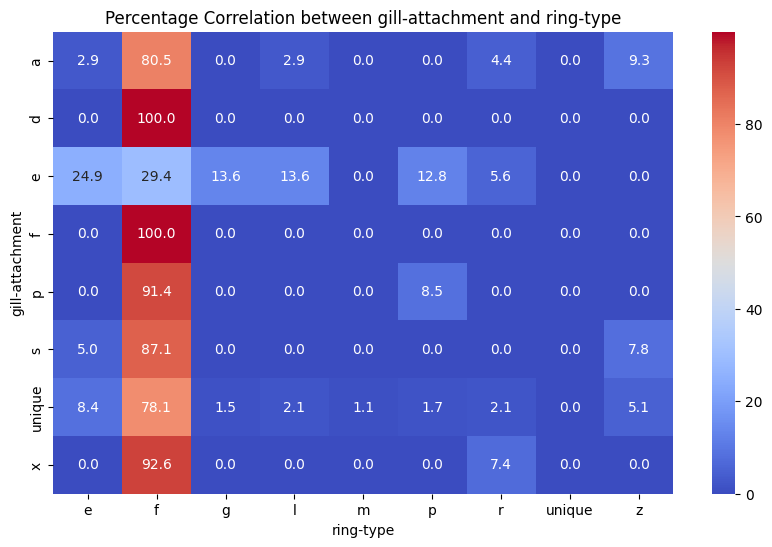

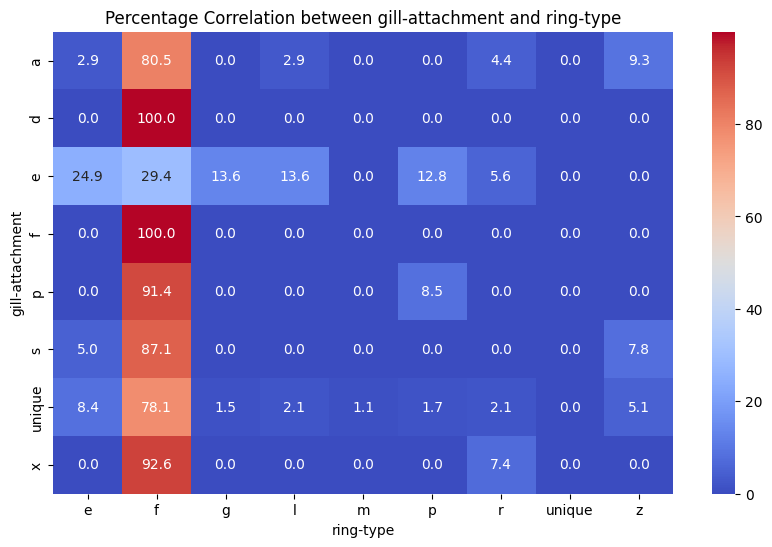

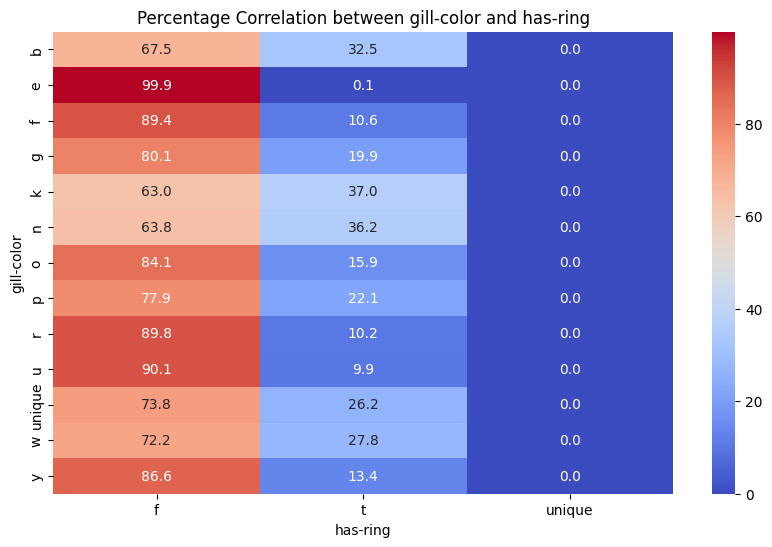

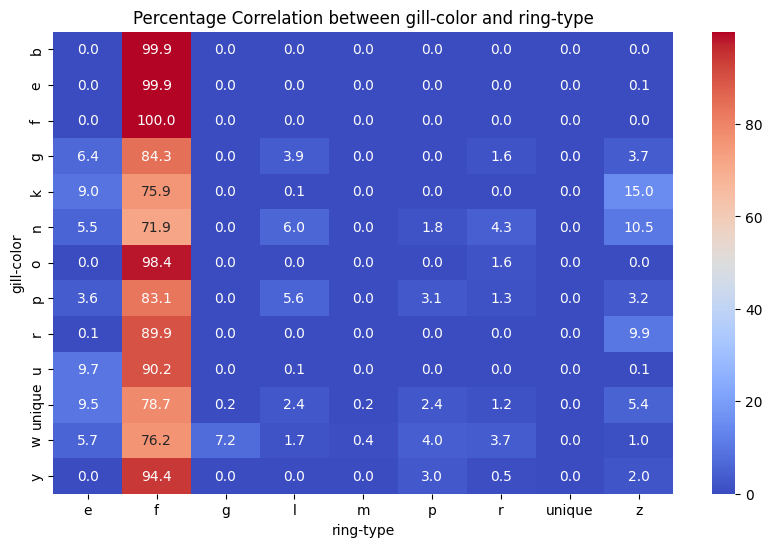

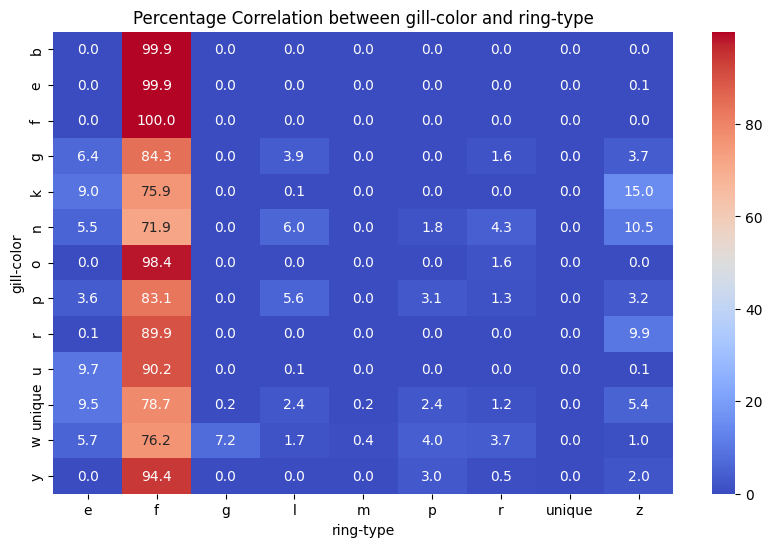

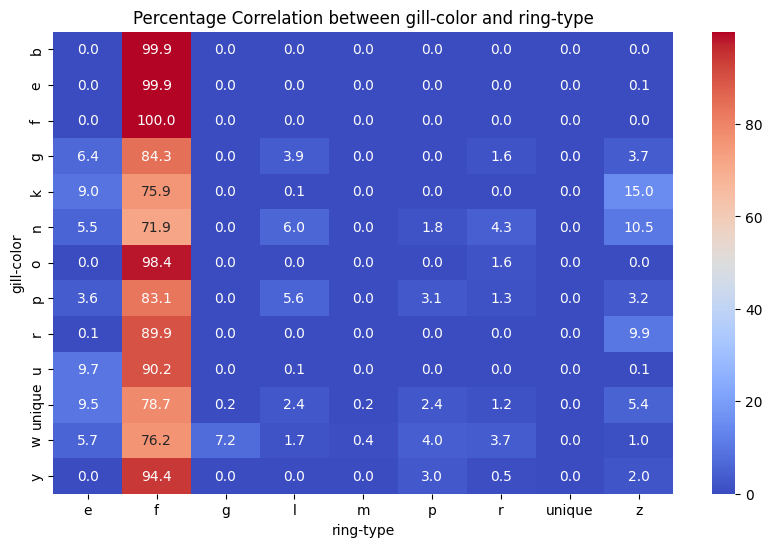

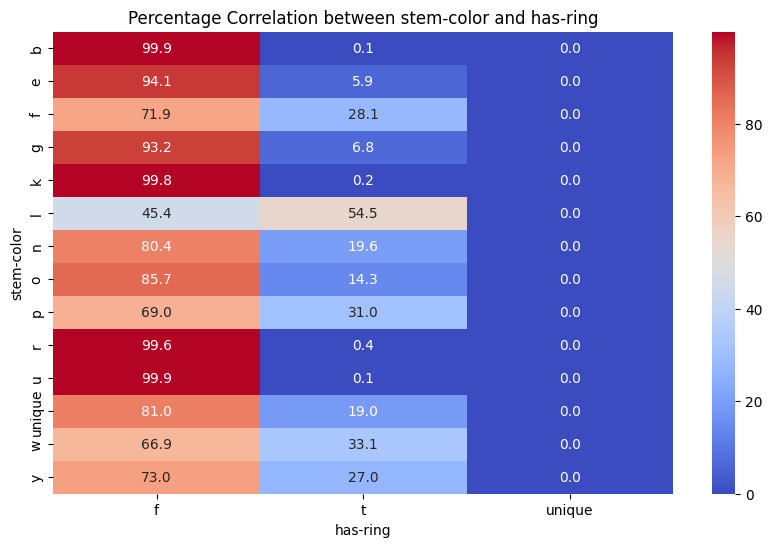

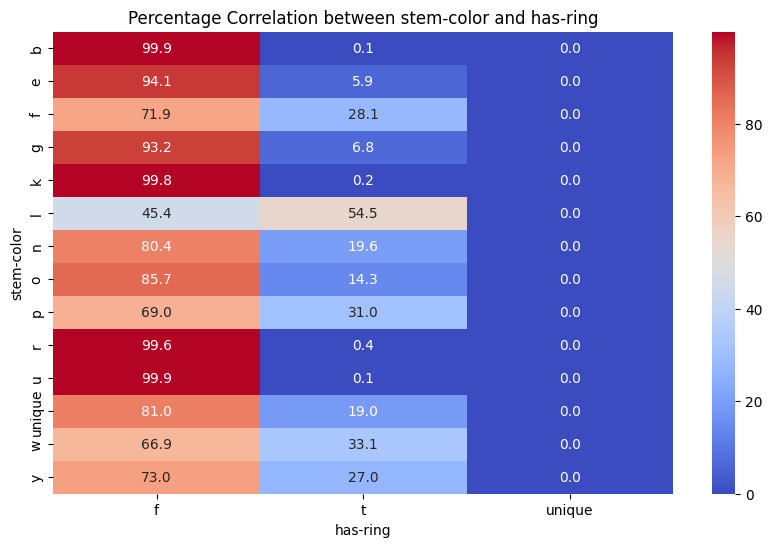

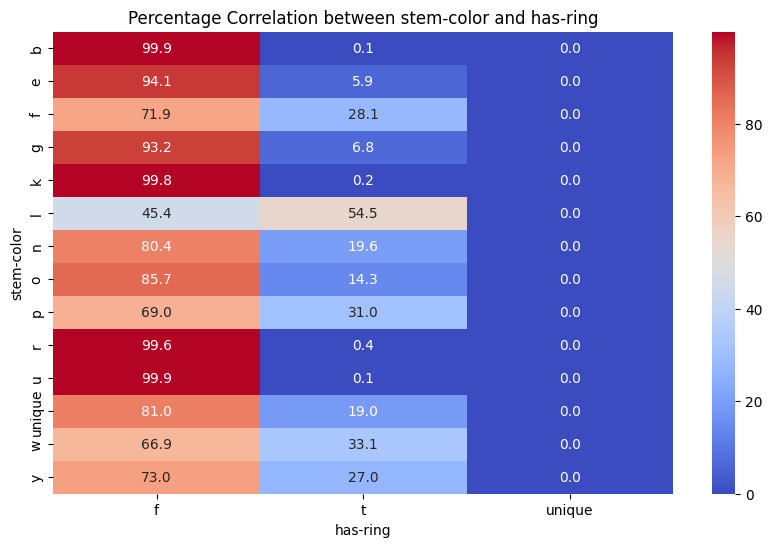

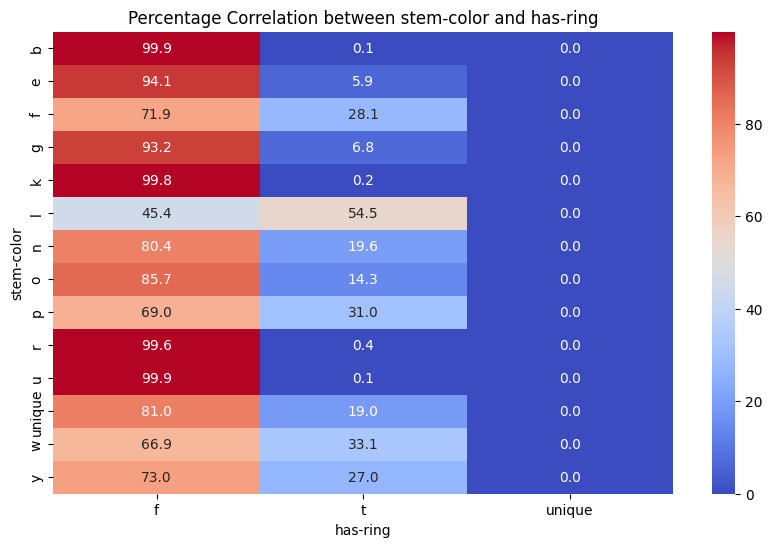

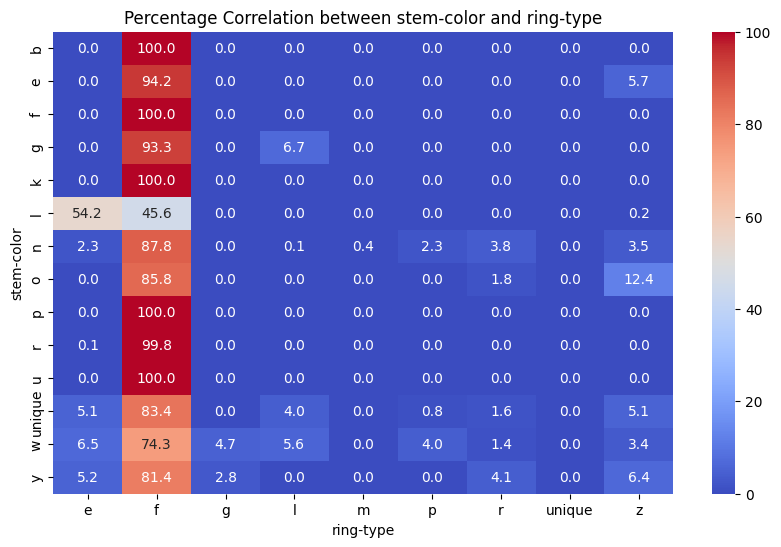

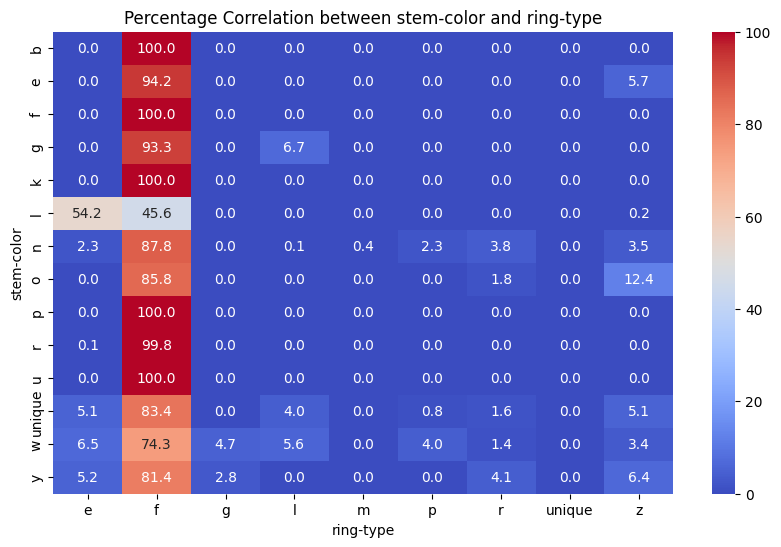

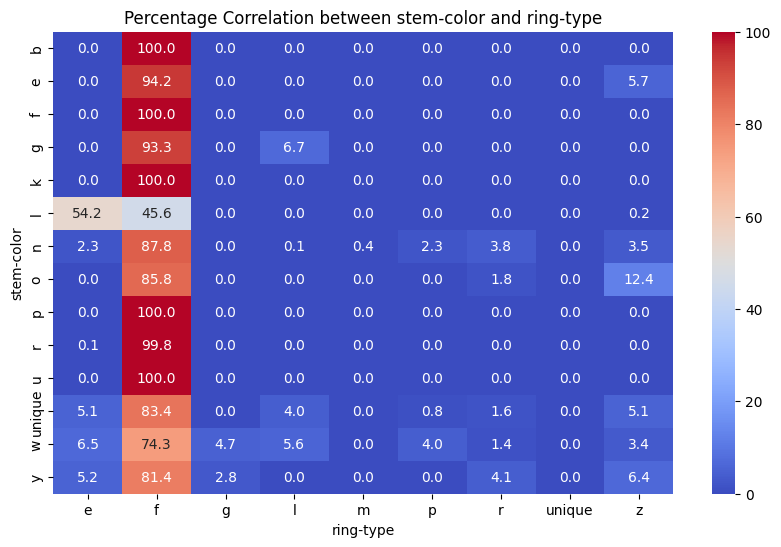

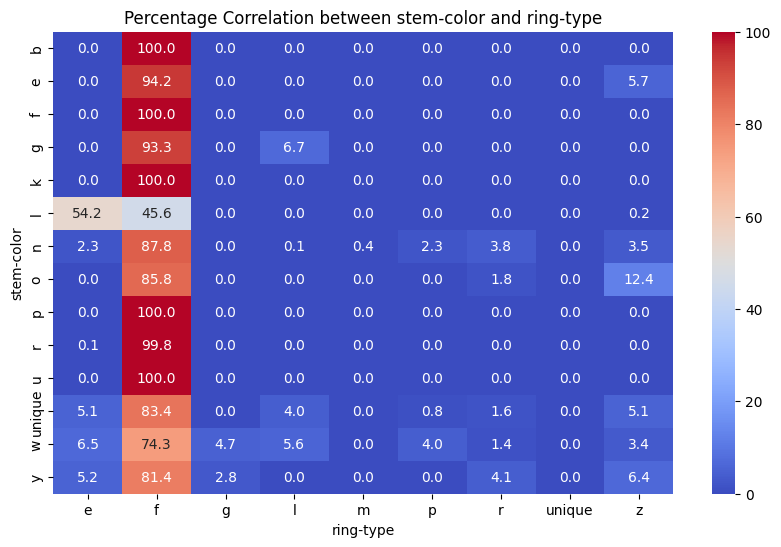

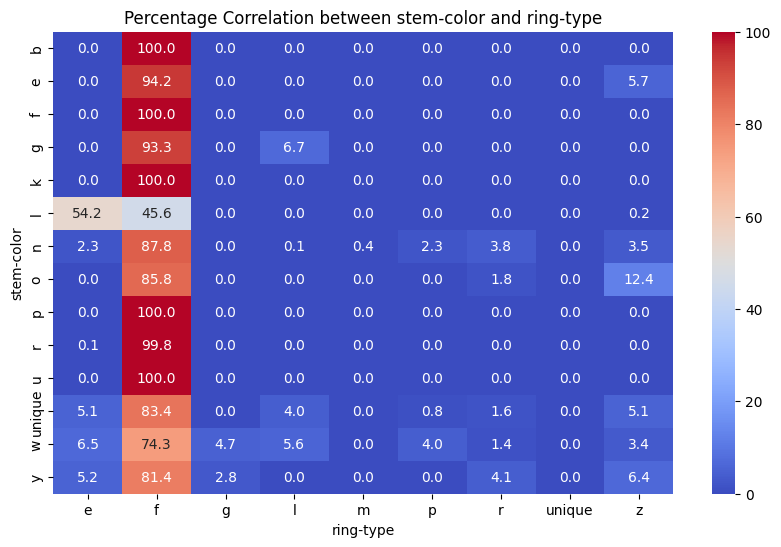

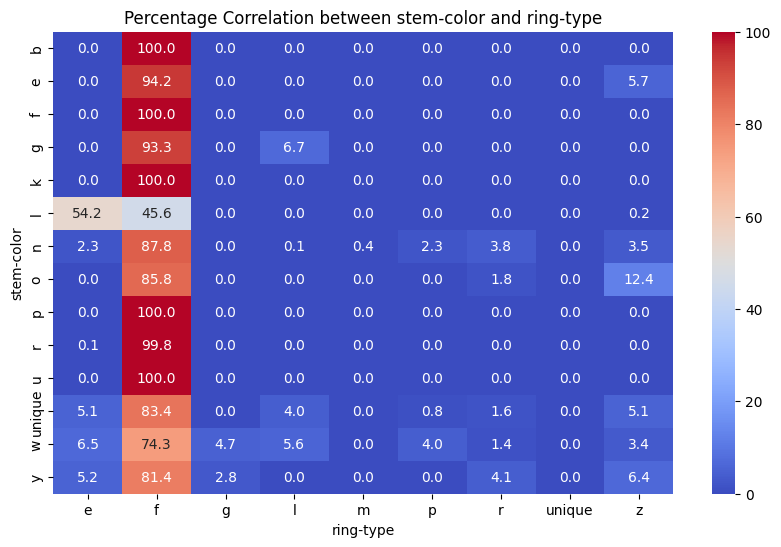

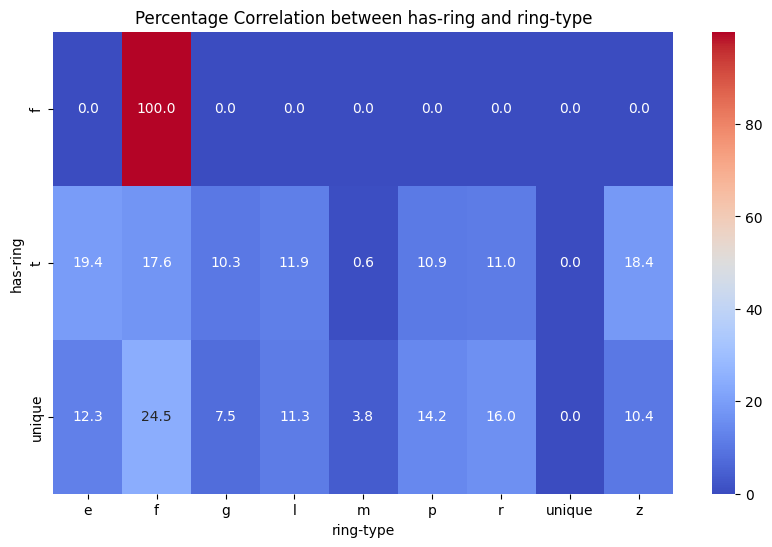

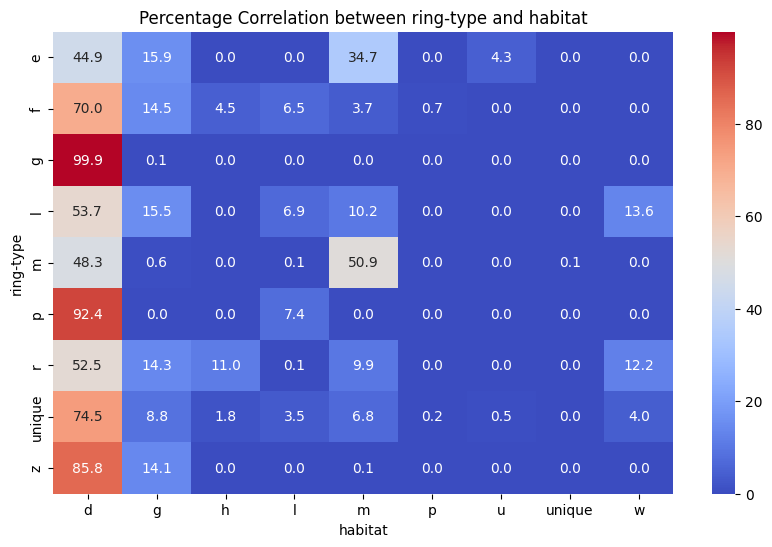

In [25]:
# Assuming perfect_correlations contains dictionaries with perfect matches
for correlation in perfect_correlations:
    col1, val1 = list(correlation.items())[0]
    col2, val2 = list(correlation.items())[1]

    # Filter data for this specific correlation
    crosstab = pd.crosstab(train[col1], train[col2], normalize='index') * 100
    # Print the crosstab for this correlation

    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='.1f')
    plt.title(f'Percentage Correlation between {col1} and {col2}')
    plt.show()

In [26]:
def apply_correlations(df, correlations):
    for corr in correlations:
        col1, val1 = list(corr.items())[0]
        col2, val2 = list(corr.items())[1]
        
        # Fill missing values in col1 if col2 has the specific value
        df.loc[(df[col2] == val2) & (df[col1].isna()), col1] = val1
        
        # Fill missing values in col2 if col1 has the specific value
        df.loc[(df[col1] == val1) & (df[col2].isna()), col2] = val2
        
        print(df.isnull().sum().sum())
 
    return df

# Apply the correlations to the DataFrame
data = apply_correlations(data, perfect_correlations)

3167143
3167142
3167134
3167115
3167105
3166844
3166821
3166820
3166818
3166818
3166804
3166791
3166785
3166667
2471972
2471970
2471894
2471891
2471888
2471888
2471837
2471837
2471837
2471837
2471833
2471833
2471832
2471831
2471831
2471827
2471760
2353086


In [27]:
# Define categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

print(categorical_cols)
print(numerical_cols)

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')
Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [28]:
# Define categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

print(categorical_cols)
print(numerical_cols)

# Create transformers for categorical and numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Fill missing values with the most frequent value
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Fill missing values with the mean value
])

# Combine transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ]
)

# Apply the transformations to the DataFrame
data = pd.DataFrame(preprocessor.fit_transform(data), columns=categorical_cols.tolist() + numerical_cols.tolist())

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season'],
      dtype='object')
Index(['id', 'cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [29]:
data.isnull().sum().sum()

0

In [30]:
# Separate the combined DataFrame into train and test sets based on the IDs
df_train = data[data['id'].isin(train_id)].drop(columns=['id'])
df_test = data[data['id'].isin(test_id)].drop(columns=['id'])

print("Training Data:")
df_train.head()

Training Data:


class cap-shape cap-color does-bruise-or-bleed gill-attachment gill-color  \
0     e         f         u                    f               a          w   
1     p         x         o                    f               a          n   
2     e         f         b                    f               x          w   
3     e         f         g                    f               s          g   
4     e         x         w                    f               d          w   

  stem-color has-ring ring-type habitat season cap-diameter stem-height  \
0          w        f         f       d      a          8.8        4.51   
1          o        t         z       d      w         4.51        4.79   
2          n        f         f       l      w         6.94        6.85   
3          w        f         f       d      u         3.88        4.16   
4          w        f         f       g      a         5.85        3.37   

  stem-width  
0      15.39  
1       6.48  
2       9.93  
3       6.53  
4       8.36

In [31]:
print("Testing Data:")
df_test.head()

Testing Data:


class cap-shape cap-color does-bruise-or-bleed gill-attachment  \
3116945     p         x         n                    t               d   
3116946     p         o         o                    f               d   
3116947     p         b         n                    f               d   
3116948     p         x         n                    f               s   
3116949     p         x         y                    f               p   

        gill-color stem-color has-ring ring-type habitat season cap-diameter  \
3116945          w          w        t         g       d      a         8.64   
3116946          y          n        f         f       d      a          6.9   
3116947          n          n        f         f       d      s          2.0   
3116948          n          w        t         z       d      u         3.47   
3116949          y          y        t         g       d      u         6.17   

        stem-height stem-width  
3116945       11.13      17.12  
3116946        1.27      10.75  
3116947        6.18       3.14  
3116948        4.98       8.51  
3116949        6.73       13.7

In [32]:
df_test = df_test.drop('class', axis=1)

In [33]:
df_test.head()

cap-shape cap-color does-bruise-or-bleed gill-attachment gill-color  \
3116945         x         n                    t               d          w   
3116946         o         o                    f               d          y   
3116947         b         n                    f               d          n   
3116948         x         n                    f               s          n   
3116949         x         y                    f               p          y   

        stem-color has-ring ring-type habitat season cap-diameter stem-height  \
3116945          w        t         g       d      a         8.64       11.13   
3116946          n        f         f       d      a          6.9        1.27   
3116947          n        f         f       d      s          2.0        6.18   
3116948          w        t         z       d      u         3.47        4.98   
3116949          y        t         g       d      u         6.17        6.73   

        stem-width  
3116945      17.12  
3116946      10.75  
3116947       3.14  
3116948       8.51  
3116949       13.7

In [34]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season', 'cap-diameter', 'stem-height', 'stem-width'],
      dtype='object')


In [35]:
print("Original DataFrame:")
print(df_test.dtypes)

Original DataFrame:
cap-shape               object
cap-color               object
does-bruise-or-bleed    object
gill-attachment         object
gill-color              object
stem-color              object
has-ring                object
ring-type               object
habitat                 object
season                  object
cap-diameter            object
stem-height             object
stem-width              object
dtype: object


In [36]:
# Convert specific columns to float
for column in ['cap-diameter', 'stem-height', 'stem-width']:
    df_train[column] = pd.to_numeric(df_train[column], errors='coerce')
    df_test[column] = pd.to_numeric(df_test[column], errors='coerce')

In [37]:
print(df_train.columns)

Index(['class', 'cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season', 'cap-diameter', 'stem-height', 'stem-width'],
      dtype='object')


In [38]:
# Convert specific columns to categorical type
categorical_columns = ['cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for col in categorical_columns:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

In [39]:
numerical_cols = df_train.select_dtypes(include=[np.number]).columns
# Apply log transformation to numerical columns
for col in numerical_cols:
    df_train[col] = np.log1p(df_train[col])
    df_test[col] = np.log1p(df_test[col])

In [40]:
df_train.head()

class cap-shape cap-color does-bruise-or-bleed gill-attachment gill-color  \
0     e         f         u                    f               a          w   
1     p         x         o                    f               a          n   
2     e         f         b                    f               x          w   
3     e         f         g                    f               s          g   
4     e         x         w                    f               d          w   

  stem-color has-ring ring-type habitat season  cap-diameter  stem-height  \
0          w        f         f       d      a      2.282382     1.706565   
1          o        t         z       d      w      1.706565     1.756132   
2          n        f         f       l      w      2.071913     2.060514   
3          w        f         f       d      u      1.585145     1.640937   
4          w        f         f       g      a      1.924249     1.474763   

   stem-width  
0    2.796671  
1    2.012233  
2    2.391511  
3    2.018895  
4    2.236445

In [41]:
df_test.head()

cap-shape cap-color does-bruise-or-bleed gill-attachment gill-color  \
3116945         x         n                    t               d          w   
3116946         o         o                    f               d          y   
3116947         b         n                    f               d          n   
3116948         x         n                    f               s          n   
3116949         x         y                    f               p          y   

        stem-color has-ring ring-type habitat season  cap-diameter  \
3116945          w        t         g       d      a      2.265921   
3116946          n        f         f       d      a      2.066863   
3116947          n        f         f       d      s      1.098612   
3116948          w        t         z       d      u      1.497388   
3116949          y        t         g       d      u      1.969906   

         stem-height  stem-width  
3116945     2.495682    2.897016  
3116946     0.819780    2.463853  
3116947     1.971299    1.420696  
3116948     1.788421    2.252344  
3116949     2.045109    2.687847

In [42]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

y = df_train['class']
X = df_train.drop('class', axis=1)

# Convert categorical labels to integer labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# Convert specific columns to categorical type
categorical_columns = ['cap-shape', 'cap-color', 'does-bruise-or-bleed',
       'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type',
       'habitat', 'season']
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])
    df_test[col] = label_encoder.fit_transform(df_test[col])
    
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42, test_size=.33, shuffle=True)

In [43]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 6, 10],
#     'n_estimators': [100, 200],
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)
# # Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


# # Evaluate on the test set
# best_model = XGBClassifier({'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200})
# y_pred = best_model.predict(X_test)
# print("Test Accuracy:", accuracy_score(y_test, y_pred))

In [44]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate on the test set
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9843018417409429


In [45]:
predictions = model.predict(df_test)

In [46]:
# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

Class mapping:
0: e
1: p


In [47]:
# Convert back to original labels
y_pred_original = label_encoder.inverse_transform(predictions)
print("Predicted labels:", predictions)
print("Real labels:", y_pred_original)

Predicted labels: [0 1 1 ... 1 0 0]
Real labels: ['e' 'p' 'p' ... 'p' 'e' 'e']


In [48]:
output = pd.DataFrame({'id':test_id, 'class':y_pred_original})
output.to_csv('submission.csv', index=False)